Load packages necessary and set the backend used for corneto/carnival

In [1]:
import pandas as pd
import corneto as cnt
from corneto.methods.carnival import carnival_renet, carnival
from corneto.backend._picos_backend import PicosBackend
from corneto.backend._base import HammingLoss
from corneto.methods.carnival import carnival, carnival_constraints, carnival_loss, carnival_renet, nx_style


Read in input data.

In [2]:
# the reduced cosmos network
rn = cnt.ReNet.from_sif('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/pkn_df.tsv', delimiter='\t', has_header=True)

# Run 1

In [3]:
# upstream perturbation
perturbations = {'TGFB1': 1}

# downstream measurements
meas_df = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df.csv')
measurements = meas_df.set_index('source')['score'].to_dict()

# bring in correct dictionary format
corneto_data = {}
for key, value in perturbations.items():
    corneto_data[key] = ('P', value)
for key, value in measurements.items():
    corneto_data[key] = ('M', value)

# prepare a final input for a single condition
corneto_data_input = {"C1": corneto_data}

# create corneto CARNIVAL net object
carnival_net = carnival_renet(rn, corneto_data_input)
# create corneto CARNIVAL problem object
cp = carnival(carnival_net, corneto_data_input, l0_penalty_reaction = 0.2, flow_implies_signal=False)
# solve
cp.solve(verbosity=1, TimeLimit=500)


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 03:49:59 PM: Your problem has 119590 variables, 33 constraints, and 0 parameters.
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 03:49:59 PM: Your problem has 119590 variables, 33 constraints, and 0 parameters.


(CVXPY) Jul 24 03:49:59 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 24 03:49:59 PM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) Jul 24 03:49:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 24 03:49:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)


(CVXPY) Jul 24 03:49:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 24 03:49:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:49:59 PM: Compiling problem (target solver=GUROBI).
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:49:59 PM: Compiling problem (target solver=GUROBI).


(CVXPY) Jul 24 03:49:59 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI
(CVXPY) Jul 24 03:49:59 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI


(CVXPY) Jul 24 03:49:59 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 24 03:49:59 PM: Applying reduction CvxAttr2Constr


(CVXPY) Jul 24 03:49:59 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Jul 24 03:49:59 PM: Applying reduction Qp2SymbolicQp


(CVXPY) Jul 24 03:49:59 PM: Applying reduction QpMatrixStuffing
(CVXPY) Jul 24 03:49:59 PM: Applying reduction QpMatrixStuffing


(CVXPY) Jul 24 03:50:01 PM: Applying reduction GUROBI
(CVXPY) Jul 24 03:50:01 PM: Applying reduction GUROBI


(CVXPY) Jul 24 03:50:01 PM: Finished problem compilation (took 1.692e+00 seconds).
(CVXPY) Jul 24 03:50:01 PM: Finished problem compilation (took 1.692e+00 seconds).


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:01 PM: Invoking solver GUROBI  to obtain a solution.
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:01 PM: Invoking solver GUROBI  to obtain a solution.


Set parameter Username
Set parameter Username


Academic license - for non-commercial use only - expires 2025-06-14
Academic license - for non-commercial use only - expires 2025-06-14


Set parameter QCPDual to value 1
Set parameter QCPDual to value 1


Set parameter TimeLimit to value 500
Set parameter TimeLimit to value 500


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])


CPU model: Apple M2 Pro
CPU model: Apple M2 Pro


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


Optimize a model with 473105 rows, 119590 columns and 890329 nonzeros
Optimize a model with 473105 rows, 119590 columns and 890329 nonzeros


Model fingerprint: 0xf579935e
Model fingerprint: 0xf579935e


Variable types: 30595 continuous, 88995 integer (88995 binary)
Variable types: 30595 continuous, 88995 integer (88995 binary)


Coefficient statistics:
Coefficient statistics:


  Matrix range     [1e-03, 3e+03]
  Matrix range     [1e-03, 3e+03]


  Objective range  [2e-01, 1e+01]
  Objective range  [2e-01, 1e+01]


  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]


  RHS range        [1e-03, 3e+03]
  RHS range        [1e-03, 3e+03]


Presolve removed 305925 rows and 7351 columns
Presolve removed 305925 rows and 7351 columns


Presolve time: 1.66s
Presolve time: 1.66s


Presolved: 167180 rows, 112239 columns, 512571 nonzeros
Presolved: 167180 rows, 112239 columns, 512571 nonzeros


Variable types: 29124 continuous, 83115 integer (83115 binary)
Variable types: 29124 continuous, 83115 integer (83115 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...
Showing barrier log only...


Root barrier log...
Root barrier log...


Ordering time: 2.26s
Ordering time: 2.26s


Ordering time: 3.73s
Ordering time: 3.73s


Barrier statistics:
Barrier statistics:


 Dense cols : 1488
 Dense cols : 1488


 AA' NZ     : 9.113e+05
 AA' NZ     : 9.113e+05


 Factor NZ  : 1.980e+07 (roughly 300 MB of memory)
 Factor NZ  : 1.980e+07 (roughly 300 MB of memory)


 Factor Ops : 4.721e+10 (less than 1 second per iteration)
 Factor Ops : 4.721e+10 (less than 1 second per iteration)


 Threads    : 9
 Threads    : 9


                  Objective                Residual
                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time
Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.28488355e+05 -2.94229012e+07  4.98e+04 3.07e+00  1.04e+03     7s
   0   3.28488355e+05 -2.94229012e+07  4.98e+04 3.07e+00  1.04e+03     7s


   1   2.74467375e+05 -2.51280306e+07  3.32e+04 2.17e+00  6.18e+02     7s
   1   2.74467375e+05 -2.51280306e+07  3.32e+04 2.17e+00  6.18e+02     7s


   2   1.66345837e+05 -2.02028411e+07  1.90e+04 5.70e-01  3.54e+02     7s
   2   1.66345837e+05 -2.02028411e+07  1.90e+04 5.70e-01  3.54e+02     7s


   3   3.32550796e+04 -1.05644866e+07  3.32e+03 2.48e-03  7.31e+01     7s
   3   3.32550796e+04 -1.05644866e+07  3.32e+03 2.48e-03  7.31e+01     7s


   4   6.99338351e+03 -2.23698048e+06  2.98e+02 1.72e-03  8.97e+00     7s
   4   6.99338351e+03 -2.23698048e+06  2.98e+02 1.72e-03  8.97e+00     7s


   5   5.59639608e+03 -8.15844077e+05  1.44e+02 6.40e-03  3.10e+00     8s
   5   5.59639608e+03 -8.15844077e+05  1.44e+02 6.40e-03  3.10e+00     8s


   6   4.39189141e+03 -1.62102536e+05  2.17e+01 5.34e-03  4.87e-01     8s
   6   4.39189141e+03 -1.62102536e+05  2.17e+01 5.34e-03  4.87e-01     8s


   7   4.02237593e+03 -2.31727162e+04  3.65e-03 1.26e-03  6.98e-02     8s
   7   4.02237593e+03 -2.31727162e+04  3.65e-03 1.26e-03  6.98e-02     8s


   8   2.50378434e+03 -2.30010217e+03  6.30e-05 3.25e-04  1.23e-02     9s
   8   2.50378434e+03 -2.30010217e+03  6.30e-05 3.25e-04  1.23e-02     9s


   9   1.21326149e+03 -9.81111928e+02  2.05e-05 1.11e-04  5.63e-03     9s
   9   1.21326149e+03 -9.81111928e+02  2.05e-05 1.11e-04  5.63e-03     9s


Barrier performed 9 iterations in 9.25 seconds (16.19 work units)
Barrier performed 9 iterations in 9.25 seconds (16.19 work units)


Barrier solve interrupted - model solved by another algorithm
Barrier solve interrupted - model solved by another algorithm


Concurrent spin time: 1.24s (can be avoided by choosing Method=3)
Concurrent spin time: 1.24s (can be avoided by choosing Method=3)


Solved with primal simplex
Solved with primal simplex


Root simplex log...
Root simplex log...


Iteration    Objective       Primal Inf.    Dual Inf.      Time
Iteration    Objective       Primal Inf.    Dual Inf.      Time


   24178   -2.0979722e+02   0.000000e+00   0.000000e+00      9s
   24178   -2.0979722e+02   0.000000e+00   0.000000e+00      9s


Root relaxation: objective -2.097972e+02, 24178 iterations, 7.18 seconds (13.85 work units)
Root relaxation: objective -2.097972e+02, 24178 iterations, 7.18 seconds (13.85 work units)


Total elapsed time = 13.86s
Total elapsed time = 13.86s


Total elapsed time = 15.56s
Total elapsed time = 15.56s


    Nodes    |    Current Node    |     Objective Bounds      |     Work
    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


     0     0 -209.79722    0   80          - -209.79722      -     -   16s
     0     0 -209.79722    0   80          - -209.79722      -     -   16s


H    0     0                    -208.5972484 -209.79722  0.58%     -   16s
H    0     0                    -208.5972484 -209.79722  0.58%     -   16s


     0     0 -209.75725    0  203 -208.59725 -209.75725  0.56%     -   18s
     0     0 -209.75725    0  203 -208.59725 -209.75725  0.56%     -   18s


H    0     0                    -209.1972484 -209.75725  0.27%     -   19s
H    0     0                    -209.1972484 -209.75725  0.27%     -   19s


H    0     0                    -209.5972484 -209.75725  0.08%     -   19s
H    0     0                    -209.5972484 -209.75725  0.08%     -   19s


     0     0 -209.75725    0  203 -209.59725 -209.75725  0.08%     -   19s
     0     0 -209.75725    0  203 -209.59725 -209.75725  0.08%     -   19s


     0     0     cutoff    0      -209.59725 -209.59725  0.00%     -   19s
     0     0     cutoff    0      -209.59725 -209.59725  0.00%     -   19s


Cutting planes:
Cutting planes:


  Gomory: 3
  Gomory: 3


  Implied bound: 22
  Implied bound: 22


  MIR: 3
  MIR: 3


  Flow cover: 2
  Flow cover: 2


  Zero half: 1
  Zero half: 1


  Network: 1
  Network: 1


  RLT: 1
  RLT: 1


Explored 1 nodes (75490 simplex iterations) in 19.81 seconds (43.83 work units)
Explored 1 nodes (75490 simplex iterations) in 19.81 seconds (43.83 work units)


Thread count was 12 (of 12 available processors)
Thread count was 12 (of 12 available processors)


Solution count 3: -209.597 -209.197 -208.597 
Solution count 3: -209.597 -209.197 -208.597 


No other solutions better than -209.597
No other solutions better than -209.597


Optimal solution found (tolerance 1.00e-04)
Optimal solution found (tolerance 1.00e-04)


Best objective -2.095972484252e+02, best bound -2.095972484252e+02, gap 0.0000%
Best objective -2.095972484252e+02, best bound -2.095972484252e+02, gap 0.0000%


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:22 PM: Problem status: optimal
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:22 PM: Problem status: optimal


(CVXPY) Jul 24 03:50:22 PM: Optimal value: 3.453e+01
(CVXPY) Jul 24 03:50:22 PM: Optimal value: 3.453e+01


(CVXPY) Jul 24 03:50:22 PM: Compilation took 1.692e+00 seconds
(CVXPY) Jul 24 03:50:22 PM: Compilation took 1.692e+00 seconds


(CVXPY) Jul 24 03:50:22 PM: Solver (including time spent in interface) took 2.108e+01 seconds
(CVXPY) Jul 24 03:50:22 PM: Solver (including time spent in interface) took 2.108e+01 seconds


Problem(Minimize(Expression(AFFINE, UNKNOWN, (1,))), [Inequality(Constant(CONSTANT, ZERO, (27805,))), Inequality(Variable((27805,))), Inequality(Constant(CONSTANT, ZERO, (27805,))), Inequality(Variable((27805,), boolean=True)), Inequality(Constant(CONSTANT, ZERO, (2790,))), Inequality(Variable((2790,), boolean=True)), Inequality(Constant(CONSTANT, ZERO, (2790,))), Inequality(Variable((2790,), boolean=True)), Inequality(Constant(CONSTANT, ZERO, (27805,))), Inequality(Variable((27805,), boolean=True)), Inequality(Constant(CONSTANT, ZERO, (27805,))), Inequality(Variable((27805,), boolean=True)), Inequality(Constant(CONSTANT, NONNEGATIVE, (2790,))), Inequality(Variable((2790,))), Equality(Expression(AFFINE, UNKNOWN, (2790,)), Constant(CONSTANT, ZERO, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Expression(AFFINE, NONNEGATIVE, (27805,))), Inequality(Variable((27805,))), Equality(Expression(AFFINE, NONNEGATIVE, (137,)), Constant(CONSTANT, ZERO, ())), Equality(Expression(

<positron-console-cell-4>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


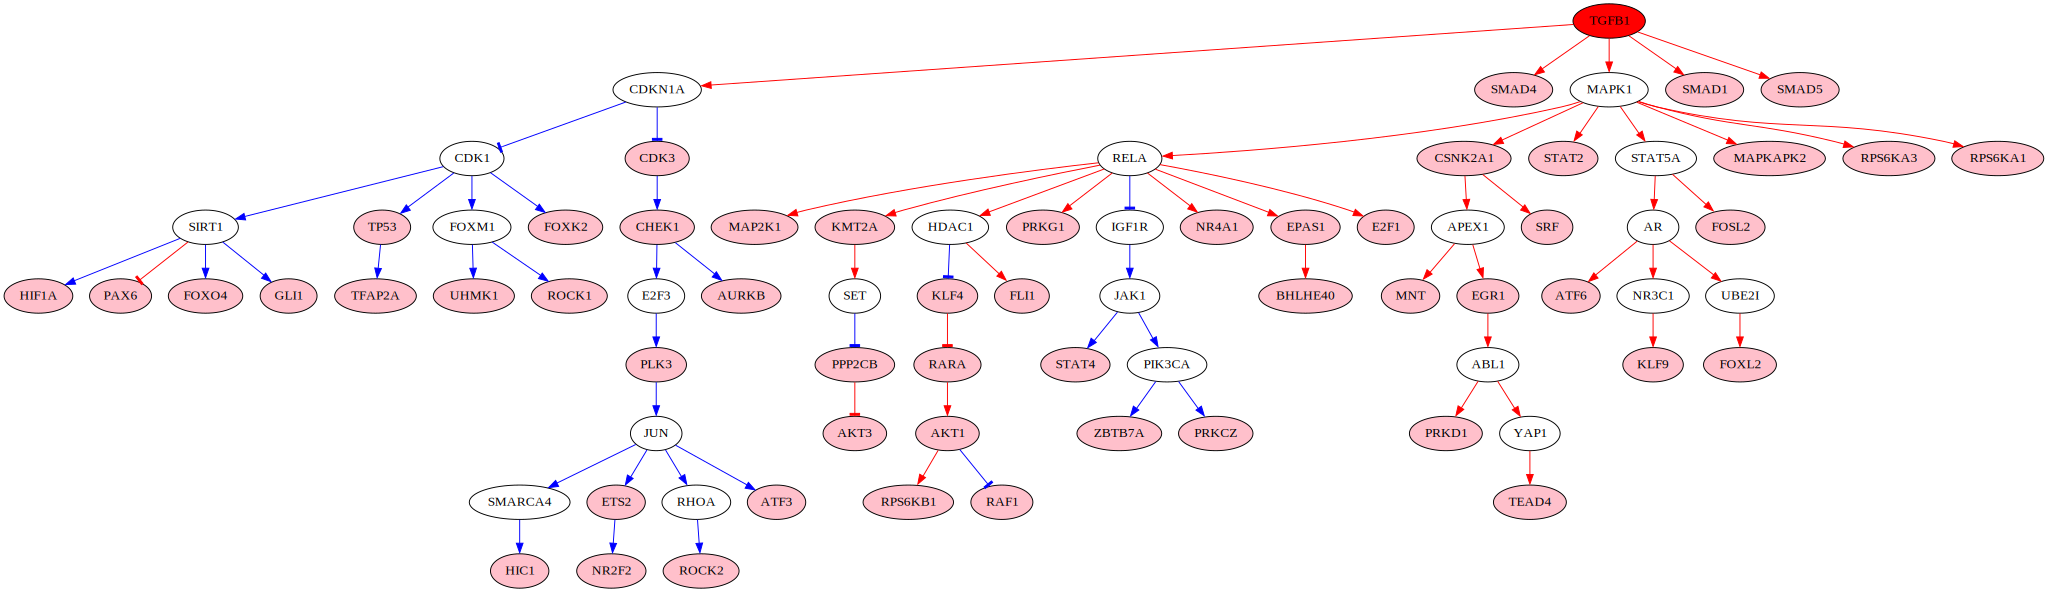

In [4]:

# extract node df and edge df
nodes_df = pd.DataFrame({'node': carnival_net.species, 'value': cp.symbols['species_activated_C1'].value - cp.symbols['species_inhibited_C1'].value})
nodes_df = nodes_df[nodes_df['value'] != 0]
edges_df = pd.DataFrame({'edge': carnival_net.reactions, 'value': cp.symbols['reaction_sends_activation_C1'].value - cp.symbols['reaction_sends_inhibition_C1'].value})
edges_df = edges_df[edges_df['value'] != 0]

# remove artificial nodes of optimization
edges_df = edges_df.loc[~edges_df['edge'].str.contains('meas|pert')]

# visualize network using graphviz
import graphviz

toplot = edges_df.copy()
# separate the edge column from the edge df into source, mor and target
toplot[['source', 'mor', 'target']] = toplot['edge'].str.split('--', expand=True)
# remove rows with null values in the mor values
toplot = toplot[toplot['mor'].notnull()]
# make the mor column numeric after removing parentheses
toplot['mor'] = toplot['mor'].str.replace('(', '').str.replace(')', '').astype(float)
toplot["arrowhead"] = toplot["mor"].apply(lambda x: "normal" if x == 1 else "tee")
# define color using the values of 'value' column, red for negative values and green for positive values
toplot["color"] = toplot["value"].apply(lambda x: "blue" if x < 0 else "red")


# create graphviz object
g = graphviz.Digraph()

# iterate over the rows of the df
for index, row in toplot.iterrows():
    # add source node using "source", "source_shape", "source_fillcolor" columns
    g.node(row["source"])
    # add target node using "target", "target_shape", "target_fillcolor" columns
    g.node(row["target"])
    # add edge using "source", "target", "arrowhead" columns
    g.edge(row["source"], row["target"], arrowhead=row["arrowhead"], color = row["color"])

p =  ["TGFB1"]
m = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df.csv')
m = set(m['source']).intersection(set(toplot['source']).union(set(toplot['target'])))


# Set the color attribute of the nodes
for node_name in p:
    g.node(node_name, style='filled', fillcolor='red')
for node_name in m:
    g.node(node_name, style='filled', fillcolor='pink') 

g

In [13]:
toplot

,edge,value,source,mor,target,arrowhead,color
87,CREB1--(1)--FLI1,1.0,CREB1,1.0,FLI1,normal,red
284,RELA--(1)--APEX1,1.0,RELA,1.0,APEX1,normal,red
641,PPP2R1A--(1)--PPP2CB,-1.0,PPP2R1A,1.0,PPP2CB,normal,blue
688,MAPK1--(1)--E2F1,1.0,MAPK1,1.0,E2F1,normal,red
694,SRC--(1)--PRKD1,1.0,SRC,1.0,PRKD1,normal,red
...,...,...,...,...,...,...,...
25908,MAPK1--(1)--NR4A1,1.0,MAPK1,1.0,NR4A1,normal,red
26007,MAPK14--(1)--AR,1.0,MAPK14,1.0,AR,normal,red
26063,HIF1A--(1)--MXI1,1.0,HIF1A,1.0,MXI1,normal,red
26124,E2F3--(1)--PLK3,-1.0,E2F3,1.0,PLK3,normal,blue


# Run 2

In [5]:
# upstream
pert_df = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df.csv')
# downstream
meas_df = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/secretome_df.csv')


#Convert to dictionaries which are the required input format.
measurements = meas_df.set_index('id')['score'].to_dict()
perturbations = pert_df.set_index('source')['score'].to_dict()
perturbations = {**perturbations, **{'TGFB1': 1}}

#Create corneto data and corneto net object.
corneto_data = {}
for key, value in perturbations.items():
    corneto_data[key] = ('P', value)
for key, value in measurements.items():
    corneto_data[key] = ('M', value)

# prepare a final input for a single condition
corneto_data_input = {"C1": corneto_data}

# create corneto CARNIVAL net object
carnival_net = carnival_renet(rn, corneto_data_input)

# Create problem object.
# create corneto CARNIVAL problem object
cp = carnival(carnival_net, corneto_data_input, l0_penalty_reaction = 0.2, flow_implies_signal=False)

# solve
cp.solve(verbosity=1, TimeLimit=500)

# extract node df and edge df
nodes_df_1 = pd.DataFrame({'node': carnival_net.species, 'value': cp.symbols['species_activated_C1'].value - cp.symbols['species_inhibited_C1'].value})
nodes_df_1 = nodes_df_1[nodes_df_1['value'] != 0]
edges_df_1 = pd.DataFrame({'edge': carnival_net.reactions, 'value': cp.symbols['reaction_sends_activation_C1'].value - cp.symbols['reaction_sends_inhibition_C1'].value})
edges_df_1 = edges_df_1[edges_df_1['value'] != 0]



                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 03:50:38 PM: Your problem has 119774 variables, 33 constraints, and 0 parameters.
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 03:50:38 PM: Your problem has 119774 variables, 33 constraints, and 0 parameters.


(CVXPY) Jul 24 03:50:38 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 24 03:50:38 PM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) Jul 24 03:50:38 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 24 03:50:38 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)


(CVXPY) Jul 24 03:50:38 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 24 03:50:38 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:38 PM: Compiling problem (target solver=GUROBI).
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:38 PM: Compiling problem (target solver=GUROBI).


(CVXPY) Jul 24 03:50:38 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI
(CVXPY) Jul 24 03:50:38 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI


(CVXPY) Jul 24 03:50:38 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 24 03:50:38 PM: Applying reduction CvxAttr2Constr


(CVXPY) Jul 24 03:50:38 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Jul 24 03:50:38 PM: Applying reduction Qp2SymbolicQp


(CVXPY) Jul 24 03:50:38 PM: Applying reduction QpMatrixStuffing
(CVXPY) Jul 24 03:50:38 PM: Applying reduction QpMatrixStuffing


(CVXPY) Jul 24 03:50:39 PM: Applying reduction GUROBI
(CVXPY) Jul 24 03:50:39 PM: Applying reduction GUROBI


(CVXPY) Jul 24 03:50:39 PM: Finished problem compilation (took 1.686e+00 seconds).
(CVXPY) Jul 24 03:50:39 PM: Finished problem compilation (took 1.686e+00 seconds).


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:39 PM: Invoking solver GUROBI  to obtain a solution.
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:50:39 PM: Invoking solver GUROBI  to obtain a solution.


Set parameter QCPDual to value 1
Set parameter QCPDual to value 1


Set parameter TimeLimit to value 500
Set parameter TimeLimit to value 500


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])


CPU model: Apple M2 Pro
CPU model: Apple M2 Pro


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


Optimize a model with 473790 rows, 119774 columns and 891677 nonzeros
Optimize a model with 473790 rows, 119774 columns and 891677 nonzeros


Model fingerprint: 0xac1f0025
Model fingerprint: 0xac1f0025


Variable types: 30641 continuous, 89133 integer (89133 binary)
Variable types: 30641 continuous, 89133 integer (89133 binary)


Coefficient statistics:
Coefficient statistics:


  Matrix range     [1e-03, 3e+03]
  Matrix range     [1e-03, 3e+03]


  Objective range  [2e-01, 1e+01]
  Objective range  [2e-01, 1e+01]


  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]


  RHS range        [1e-03, 3e+03]
  RHS range        [1e-03, 3e+03]


Presolve removed 305521 rows and 6799 columns
Presolve removed 305521 rows and 6799 columns


Presolve time: 1.39s
Presolve time: 1.39s


Presolved: 168269 rows, 112975 columns, 515792 nonzeros
Presolved: 168269 rows, 112975 columns, 515792 nonzeros


Variable types: 29344 continuous, 83631 integer (83629 binary)
Variable types: 29344 continuous, 83631 integer (83629 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...
Showing barrier log only...


Root barrier log...
Root barrier log...


Ordering time: 2.02s
Ordering time: 2.02s


Ordering time: 3.77s
Ordering time: 3.77s


Barrier performed 0 iterations in 6.02 seconds (7.51 work units)
Barrier performed 0 iterations in 6.02 seconds (7.51 work units)


Barrier solve interrupted - model solved by another algorithm
Barrier solve interrupted - model solved by another algorithm


Concurrent spin time: 2.32s (can be avoided by choosing Method=3)
Concurrent spin time: 2.32s (can be avoided by choosing Method=3)


Solved with dual simplex
Solved with dual simplex


Root simplex log...
Root simplex log...


Iteration    Objective       Primal Inf.    Dual Inf.      Time
Iteration    Objective       Primal Inf.    Dual Inf.      Time


   16532   -2.7396137e+02   0.000000e+00   0.000000e+00      6s
   16532   -2.7396137e+02   0.000000e+00   0.000000e+00      6s


Root relaxation: objective -2.739614e+02, 16532 iterations, 4.23 seconds (3.70 work units)
Root relaxation: objective -2.739614e+02, 16532 iterations, 4.23 seconds (3.70 work units)


    Nodes    |    Current Node    |     Objective Bounds      |     Work
    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


     0     0 -273.96137    0  285          - -273.96137      -     -    7s
     0     0 -273.96137    0  285          - -273.96137      -     -    7s


H    0     0                    -253.7085505 -273.96137  7.98%     -    7s
H    0     0                    -253.7085505 -273.96137  7.98%     -    7s


H    0     0                    -265.9616509 -273.96137  3.01%     -    9s
H    0     0                    -265.9616509 -273.96137  3.01%     -    9s


H    0     0                    -266.1616509 -273.96137  2.93%     -    9s
H    0     0                    -266.1616509 -273.96137  2.93%     -    9s


     0     0 -272.66145    0  369 -266.16165 -272.66145  2.44%     -   12s
     0     0 -272.66145    0  369 -266.16165 -272.66145  2.44%     -   12s


H    0     0                    -269.3616509 -272.66145  1.23%     -   15s
H    0     0                    -269.3616509 -272.66145  1.23%     -   15s


     0     0 -272.66143    0  368 -269.36165 -272.66143  1.23%     -   15s
     0     0 -272.66143    0  368 -269.36165 -272.66143  1.23%     -   15s


     0     0 -272.41152    0  376 -269.36165 -272.41152  1.13%     -   18s
     0     0 -272.41152    0  376 -269.36165 -272.41152  1.13%     -   18s


     0     0 -272.39486    0  370 -269.36165 -272.39486  1.13%     -   21s
     0     0 -272.39486    0  370 -269.36165 -272.39486  1.13%     -   21s


     0     0 -272.39486    0  361 -269.36165 -272.39486  1.13%     -   21s
     0     0 -272.39486    0  361 -269.36165 -272.39486  1.13%     -   21s


     0     0 -272.36153    0  378 -269.36165 -272.36153  1.11%     -   24s
     0     0 -272.36153    0  378 -269.36165 -272.36153  1.11%     -   24s


H    0     0                    -269.7616509 -272.36153  0.96%     -   29s
H    0     0                    -269.7616509 -272.36153  0.96%     -   29s


     0     0 -272.29657    0  411 -269.76165 -272.29657  0.94%     -   31s
     0     0 -272.29657    0  411 -269.76165 -272.29657  0.94%     -   31s


     0     0 -272.23571    0  411 -269.76165 -272.23571  0.92%     -   31s
     0     0 -272.23571    0  411 -269.76165 -272.23571  0.92%     -   31s


     0     0 -272.18764    0  354 -269.76165 -272.18764  0.90%     -   33s
     0     0 -272.18764    0  354 -269.76165 -272.18764  0.90%     -   33s


     0     0 -272.18763    0  383 -269.76165 -272.18763  0.90%     -   33s
     0     0 -272.18763    0  383 -269.76165 -272.18763  0.90%     -   33s


     0     0 -272.16583    0  390 -269.76165 -272.16583  0.89%     -   35s
     0     0 -272.16583    0  390 -269.76165 -272.16583  0.89%     -   35s


     0     0 -272.15677    0  416 -269.76165 -272.15677  0.89%     -   36s
     0     0 -272.15677    0  416 -269.76165 -272.15677  0.89%     -   36s


     0     0 -272.15677    0  413 -269.76165 -272.15677  0.89%     -   36s
     0     0 -272.15677    0  413 -269.76165 -272.15677  0.89%     -   36s


     0     0 -272.12599    0  477 -269.76165 -272.12599  0.88%     -   38s
     0     0 -272.12599    0  477 -269.76165 -272.12599  0.88%     -   38s


     0     0 -272.12451    0  503 -269.76165 -272.12451  0.88%     -   40s
     0     0 -272.12451    0  503 -269.76165 -272.12451  0.88%     -   40s


     0     0 -272.11764    0  501 -269.76165 -272.11764  0.87%     -   40s
     0     0 -272.11764    0  501 -269.76165 -272.11764  0.87%     -   40s


     0     0 -272.11764    0  512 -269.76165 -272.11764  0.87%     -   41s
     0     0 -272.11764    0  512 -269.76165 -272.11764  0.87%     -   41s


     0     0 -272.04481    0  478 -269.76165 -272.04481  0.85%     -   42s
     0     0 -272.04481    0  478 -269.76165 -272.04481  0.85%     -   42s


     0     0 -272.04339    0  480 -269.76165 -272.04339  0.85%     -   43s
     0     0 -272.04339    0  480 -269.76165 -272.04339  0.85%     -   43s


     0     0 -272.04339    0  486 -269.76165 -272.04339  0.85%     -   43s
     0     0 -272.04339    0  486 -269.76165 -272.04339  0.85%     -   43s


     0     0 -272.04312    0  463 -269.76165 -272.04312  0.85%     -   44s
     0     0 -272.04312    0  463 -269.76165 -272.04312  0.85%     -   44s


     0     0 -272.04101    0  472 -269.76165 -272.04101  0.84%     -   49s
     0     0 -272.04101    0  472 -269.76165 -272.04101  0.84%     -   49s


     0     0 -272.04101    0  478 -269.76165 -272.04101  0.84%     -   49s
     0     0 -272.04101    0  478 -269.76165 -272.04101  0.84%     -   49s


     0     0 -272.00100    0  498 -269.76165 -272.00100  0.83%     -   50s
     0     0 -272.00100    0  498 -269.76165 -272.00100  0.83%     -   50s


     0     0 -271.98861    0  483 -269.76165 -271.98861  0.83%     -   51s
     0     0 -271.98861    0  483 -269.76165 -271.98861  0.83%     -   51s


     0     0 -271.98861    0  498 -269.76165 -271.98861  0.83%     -   51s
     0     0 -271.98861    0  498 -269.76165 -271.98861  0.83%     -   51s


     0     0 -271.98841    0  507 -269.76165 -271.98841  0.83%     -   52s
     0     0 -271.98841    0  507 -269.76165 -271.98841  0.83%     -   52s


     0     0 -271.98833    0  512 -269.76165 -271.98833  0.83%     -   53s
     0     0 -271.98833    0  512 -269.76165 -271.98833  0.83%     -   53s


     0     0 -271.98833    0  530 -269.76165 -271.98833  0.83%     -   54s
     0     0 -271.98833    0  530 -269.76165 -271.98833  0.83%     -   54s


     0     0 -271.98833    0  519 -269.76165 -271.98833  0.83%     -   63s
     0     0 -271.98833    0  519 -269.76165 -271.98833  0.83%     -   63s


     0     0 -271.96840    0  362 -269.76165 -271.96840  0.82%     -   68s
     0     0 -271.96840    0  362 -269.76165 -271.96840  0.82%     -   68s


     0     0 -271.96840    0  382 -269.76165 -271.96840  0.82%     -   71s
     0     0 -271.96840    0  382 -269.76165 -271.96840  0.82%     -   71s


     0     0 -271.95279    0  413 -269.76165 -271.95279  0.81%     -   73s
     0     0 -271.95279    0  413 -269.76165 -271.95279  0.81%     -   73s


H    0     0                    -269.9616509 -271.95279  0.74%     -   79s
H    0     0                    -269.9616509 -271.95279  0.74%     -   79s


     0     0 -271.95269    0  412 -269.96165 -271.95269  0.74%     -   79s
     0     0 -271.95269    0  412 -269.96165 -271.95269  0.74%     -   79s


     0     0 -271.95269    0  443 -269.96165 -271.95269  0.74%     -   81s
     0     0 -271.95269    0  443 -269.96165 -271.95269  0.74%     -   81s


     0     0 -271.95269    0  436 -269.96165 -271.95269  0.74%     -   82s
     0     0 -271.95269    0  436 -269.96165 -271.95269  0.74%     -   82s


     0     0 -271.95269    0  458 -269.96165 -271.95269  0.74%     -   83s
     0     0 -271.95269    0  458 -269.96165 -271.95269  0.74%     -   83s


H    0     0                    -270.3616509 -271.95269  0.59%     -   88s
H    0     0                    -270.3616509 -271.95269  0.59%     -   88s


     0     0 -271.95269    0  467 -270.36165 -271.95269  0.59%     -   88s
     0     0 -271.95269    0  467 -270.36165 -271.95269  0.59%     -   88s


     0     0 -271.95269    0  381 -270.36165 -271.95269  0.59%     -   92s
     0     0 -271.95269    0  381 -270.36165 -271.95269  0.59%     -   92s


     0     0 -271.95269    0  381 -270.36165 -271.95269  0.59%     -   94s
     0     0 -271.95269    0  381 -270.36165 -271.95269  0.59%     -   94s


     0     2 -271.95269    0  375 -270.36165 -271.95269  0.59%     -  102s
     0     2 -271.95269    0  375 -270.36165 -271.95269  0.59%     -  102s


     7    16 -271.81779    3  397 -270.36165 -271.93405  0.58%  1835  106s
     7    16 -271.81779    3  397 -270.36165 -271.93405  0.58%  1835  106s


    15    28 -271.80505    4  390 -270.36165 -271.88796  0.56%  1884  110s
    15    28 -271.80505    4  390 -270.36165 -271.88796  0.56%  1884  110s


    39    52 -271.72581    6  415 -270.36165 -271.85665  0.55%  2049  115s
    39    52 -271.72581    6  415 -270.36165 -271.85665  0.55%  2049  115s


    88   101 -271.66721   10  395 -270.36165 -271.85665  0.55%  1152  121s
    88   101 -271.66721   10  395 -270.36165 -271.85665  0.55%  1152  121s


   126   139 -271.60802   13  367 -270.36165 -271.85665  0.55%   935  125s
   126   139 -271.60802   13  367 -270.36165 -271.85665  0.55%   935  125s


   153   171 -271.54524   15  339 -270.36165 -271.85665  0.55%   899  130s
   153   171 -271.54524   15  339 -270.36165 -271.85665  0.55%   899  130s


   185   202 -271.48193   17  346 -270.36165 -271.85665  0.55%   896  135s
   185   202 -271.48193   17  346 -270.36165 -271.85665  0.55%   896  135s


   244   262 -271.45636   21  289 -270.36165 -271.85665  0.55%   845  142s
   244   262 -271.45636   21  289 -270.36165 -271.85665  0.55%   845  142s


   271   289 -271.45636   22  277 -270.36165 -271.85665  0.55%   816  145s
   271   289 -271.45636   22  277 -270.36165 -271.85665  0.55%   816  145s


   302   312 -271.45636   23  278 -270.36165 -271.85665  0.55%   784  155s
   302   312 -271.45636   23  278 -270.36165 -271.85665  0.55%   784  155s


   327   344 -271.35633   24  285 -270.36165 -271.85665  0.55%   850  165s
   327   344 -271.35633   24  285 -270.36165 -271.85665  0.55%   850  165s


   359   356 -271.44804   25  290 -270.36165 -271.85665  0.55%   884  177s
   359   356 -271.44804   25  290 -270.36165 -271.85665  0.55%   884  177s


   371   396 -271.44804   26  297 -270.36165 -271.85665  0.55%   933  181s
   371   396 -271.44804   26  297 -270.36165 -271.85665  0.55%   933  181s


   452   479 -271.42301   31  268 -270.36165 -271.85665  0.55%   894  188s
   452   479 -271.42301   31  268 -270.36165 -271.85665  0.55%   894  188s


   504   534 -271.38966   33  304 -270.36165 -271.85665  0.55%   857  191s
   504   534 -271.38966   33  304 -270.36165 -271.85665  0.55%   857  191s


   559   577 -271.38965   37  280 -270.36165 -271.85665  0.55%   813  197s
   559   577 -271.38965   37  280 -270.36165 -271.85665  0.55%   813  197s


   602   628 -271.38963   43  236 -270.36165 -271.85665  0.55%   804  202s
   602   628 -271.38963   43  236 -270.36165 -271.85665  0.55%   804  202s


   657   686 -271.38962   50  242 -270.36165 -271.85665  0.55%   772  206s
   657   686 -271.38962   50  242 -270.36165 -271.85665  0.55%   772  206s


   796   842 -271.38961   60  227 -270.36165 -271.85665  0.55%   698  216s
   796   842 -271.38961   60  227 -270.36165 -271.85665  0.55%   698  216s


   890   886 -271.38961   65  260 -270.36165 -271.85665  0.55%   668  221s
   890   886 -271.38961   65  260 -270.36165 -271.85665  0.55%   668  221s


   934   964 -271.38961   66  246 -270.36165 -271.85665  0.55%   679  227s
   934   964 -271.38961   66  246 -270.36165 -271.85665  0.55%   679  227s


  1012  1025 -271.38960   82  239 -270.36165 -271.85665  0.55%   669  232s
  1012  1025 -271.38960   82  239 -270.36165 -271.85665  0.55%   669  232s


  1073  1116 -271.38960   86  208 -270.36165 -271.85665  0.55%   666  238s
  1073  1116 -271.38960   86  208 -270.36165 -271.85665  0.55%   666  238s


  1164  1205 -271.38960   92  283 -270.36165 -271.85665  0.55%   650  242s
  1164  1205 -271.38960   92  283 -270.36165 -271.85665  0.55%   650  242s


  1253  1310 -271.38959  103  259 -270.36165 -271.85665  0.55%   626  247s
  1253  1310 -271.38959  103  259 -270.36165 -271.85665  0.55%   626  247s


  1358  1403 -271.38959  106  274 -270.36165 -271.85665  0.55%   600  252s
  1358  1403 -271.38959  106  274 -270.36165 -271.85665  0.55%   600  252s


  1451  1490 -271.38958  108  274 -270.36165 -271.85665  0.55%   584  258s
  1451  1490 -271.38958  108  274 -270.36165 -271.85665  0.55%   584  258s


  1538  1585 -271.38958  116  248 -270.36165 -271.85665  0.55%   576  264s
  1538  1585 -271.38958  116  248 -270.36165 -271.85665  0.55%   576  264s


  1642  1700 -271.38956  122  255 -270.36165 -271.85665  0.55%   570  271s
  1642  1700 -271.38956  122  255 -270.36165 -271.85665  0.55%   570  271s


  1771  1838 -271.38956  133  231 -270.36165 -271.85665  0.55%   555  276s
  1771  1838 -271.38956  133  231 -270.36165 -271.85665  0.55%   555  276s


  1943  1944 -271.38956  148  242 -270.36165 -271.85665  0.55%   527  288s
  1943  1944 -271.38956  148  242 -270.36165 -271.85665  0.55%   527  288s


  2068  2058 -271.38956  152  265 -270.36165 -271.85665  0.55%   513  294s
  2068  2058 -271.38956  152  265 -270.36165 -271.85665  0.55%   513  294s


  2197  2130 -271.38956  167  217 -270.36165 -271.85665  0.55%   505  303s
  2197  2130 -271.38956  167  217 -270.36165 -271.85665  0.55%   505  303s


  2280  2266 -271.38956  174  233 -270.36165 -271.85665  0.55%   500  310s
  2280  2266 -271.38956  174  233 -270.36165 -271.85665  0.55%   500  310s


  2416  2378 -271.38956  180  234 -270.36165 -271.85665  0.55%   490  317s
  2416  2378 -271.38956  180  234 -270.36165 -271.85665  0.55%   490  317s


  2529  2502 -271.38954  197  237 -270.36165 -271.85665  0.55%   490  325s
  2529  2502 -271.38954  197  237 -270.36165 -271.85665  0.55%   490  325s


  2668  2580 -271.36459  208  360 -270.36165 -271.85665  0.55%   490  339s
  2668  2580 -271.36459  208  360 -270.36165 -271.85665  0.55%   490  339s


  2752  2701 -271.29972  209  346 -270.36165 -271.85665  0.55%   505  349s
  2752  2701 -271.29972  209  346 -270.36165 -271.85665  0.55%   505  349s


  2882  2885 -271.28957  210  305 -270.36165 -271.85665  0.55%   506  358s
  2882  2885 -271.28957  210  305 -270.36165 -271.85665  0.55%   506  358s


  3080  3030 -271.28955  220  307 -270.36165 -271.85665  0.55%   496  366s
  3080  3030 -271.28955  220  307 -270.36165 -271.85665  0.55%   496  366s


  3226  3213 -271.28955  222  305 -270.36165 -271.85665  0.55%   494  376s
  3226  3213 -271.28955  222  305 -270.36165 -271.85665  0.55%   494  376s


  3411  3276 -271.22292  229  291 -270.36165 -271.85665  0.55%   489  383s
  3411  3276 -271.22292  229  291 -270.36165 -271.85665  0.55%   489  383s


  3474  3437 -271.14792  229  344 -270.36165 -271.85665  0.55%   485  394s
  3474  3437 -271.14792  229  344 -270.36165 -271.85665  0.55%   485  394s


  3641  3660 -271.18965  230  277 -270.36165 -271.85665  0.55%   482  406s
  3641  3660 -271.18965  230  277 -270.36165 -271.85665  0.55%   482  406s


  3869  3848 -271.18960  231  282 -270.36165 -271.85665  0.55%   476  416s
  3869  3848 -271.18960  231  282 -270.36165 -271.85665  0.55%   476  416s


  4060  4049 -271.18958  240  271 -270.36165 -271.85665  0.55%   473  430s
  4060  4049 -271.18958  240  271 -270.36165 -271.85665  0.55%   473  430s


  4269  4287 -271.18954  246  266 -270.36165 -271.85665  0.55%   473  448s
  4269  4287 -271.18954  246  266 -270.36165 -271.85665  0.55%   473  448s


  4534  4482 -271.18954  250  287 -270.36165 -271.85665  0.55%   465  462s
  4534  4482 -271.18954  250  287 -270.36165 -271.85665  0.55%   465  462s


  4740  4688 -271.18954  266  273 -270.36165 -271.85665  0.55%   462  476s
  4740  4688 -271.18954  266  273 -270.36165 -271.85665  0.55%   462  476s


  4968  4860 -271.18953  288  319 -270.36165 -271.85665  0.55%   462  492s
  4968  4860 -271.18953  288  319 -270.36165 -271.85665  0.55%   462  492s


  5147  4861 -270.96147   83  381 -270.36165 -271.85665  0.55%   463  498s
  5147  4861 -270.96147   83  381 -270.36165 -271.85665  0.55%   463  498s


Explored 5148 nodes (2546160 simplex iterations) in 500.17 seconds (808.68 work units)
Explored 5148 nodes (2546160 simplex iterations) in 500.17 seconds (808.68 work units)


Thread count was 12 (of 12 available processors)
Thread count was 12 (of 12 available processors)


Solution count 7: -270.362 -269.962 -269.762 ... -253.709
Solution count 7: -270.362 -269.962 -269.762 ... -253.709


Time limit reached
Time limit reached


Best objective -2.703616508875e+02, best bound -2.718566508875e+02, gap 0.5530%
Best objective -2.703616508875e+02, best bound -2.718566508875e+02, gap 0.5530%


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:59:01 PM: Problem status: user_limit
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 03:59:01 PM: Problem status: user_limit


(CVXPY) Jul 24 03:59:01 PM: Optimal value: 3.981e+01
(CVXPY) Jul 24 03:59:01 PM: Optimal value: 3.981e+01


(CVXPY) Jul 24 03:59:01 PM: Compilation took 1.686e+00 seconds
(CVXPY) Jul 24 03:59:01 PM: Compilation took 1.686e+00 seconds


(CVXPY) Jul 24 03:59:01 PM: Solver (including time spent in interface) took 5.014e+02 seconds
(CVXPY) Jul 24 03:59:01 PM: Solver (including time spent in interface) took 5.014e+02 seconds


/Users/burtsche/miniconda3/envs/corneto/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


<positron-console-cell-6>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


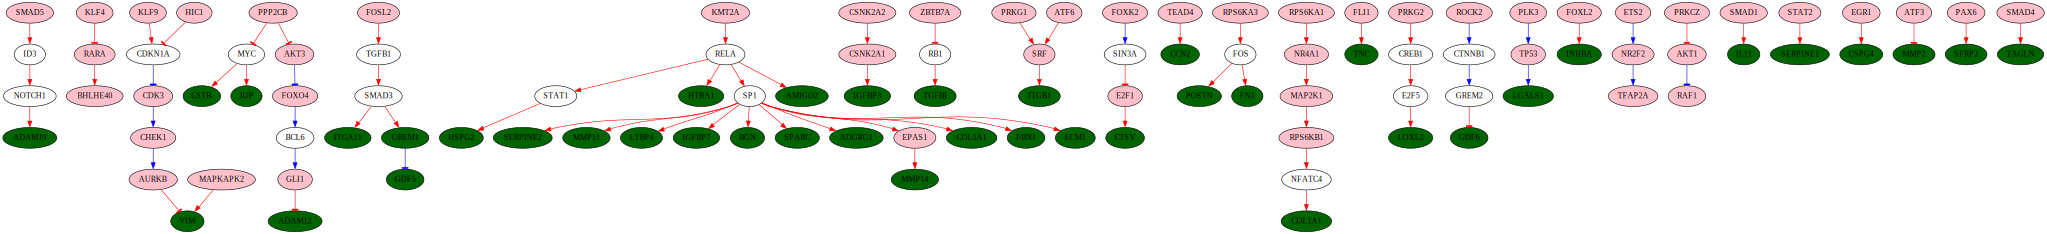

In [6]:
edges_df_1 = edges_df_1.loc[~edges_df_1['edge'].str.contains('meas|pert')]

import graphviz

toplot = edges_df_1.copy()
# separate the edge column from the edge df into source, mor and target
toplot[['source', 'mor', 'target']] = toplot['edge'].str.split('--', expand=True)
# remove rows with null values in the mor values
toplot = toplot[toplot['mor'].notnull()]
# make the mor column numeric after removing parentheses
toplot['mor'] = toplot['mor'].str.replace('(', '').str.replace(')', '').astype(float)
toplot["arrowhead"] = toplot["mor"].apply(lambda x: "normal" if x == 1 else "tee")
# define color using the values of 'value' column, red for negative values and green for positive values
toplot["color"] = toplot["value"].apply(lambda x: "blue" if x < 0 else "red")


# create graphviz object
g = graphviz.Digraph()

# iterate over the rows of the df
for index, row in toplot.iterrows():
    # add source node using "source", "source_shape", "source_fillcolor" columns
    g.node(row["source"])
    # add target node using "target", "target_shape", "target_fillcolor" columns
    g.node(row["target"])
    # add edge using "source", "target", "arrowhead" columns
    g.edge(row["source"], row["target"], arrowhead=row["arrowhead"], color = row["color"])

p = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df.csv')
p = set(p['source']).intersection(set(toplot['source']).union(set(toplot['target'])))
m = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/secretome_df.csv')
m = set(m['id']).intersection(set(toplot['source']).union(set(toplot['target'])))


# Set the color attribute of the nodes
for node_name in p:
    g.node(node_name, style='filled', fillcolor='pink')
for node_name in m:
    g.node(node_name, style='filled', fillcolor='darkgreen') 

g

## network 1

<positron-console-cell-7>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


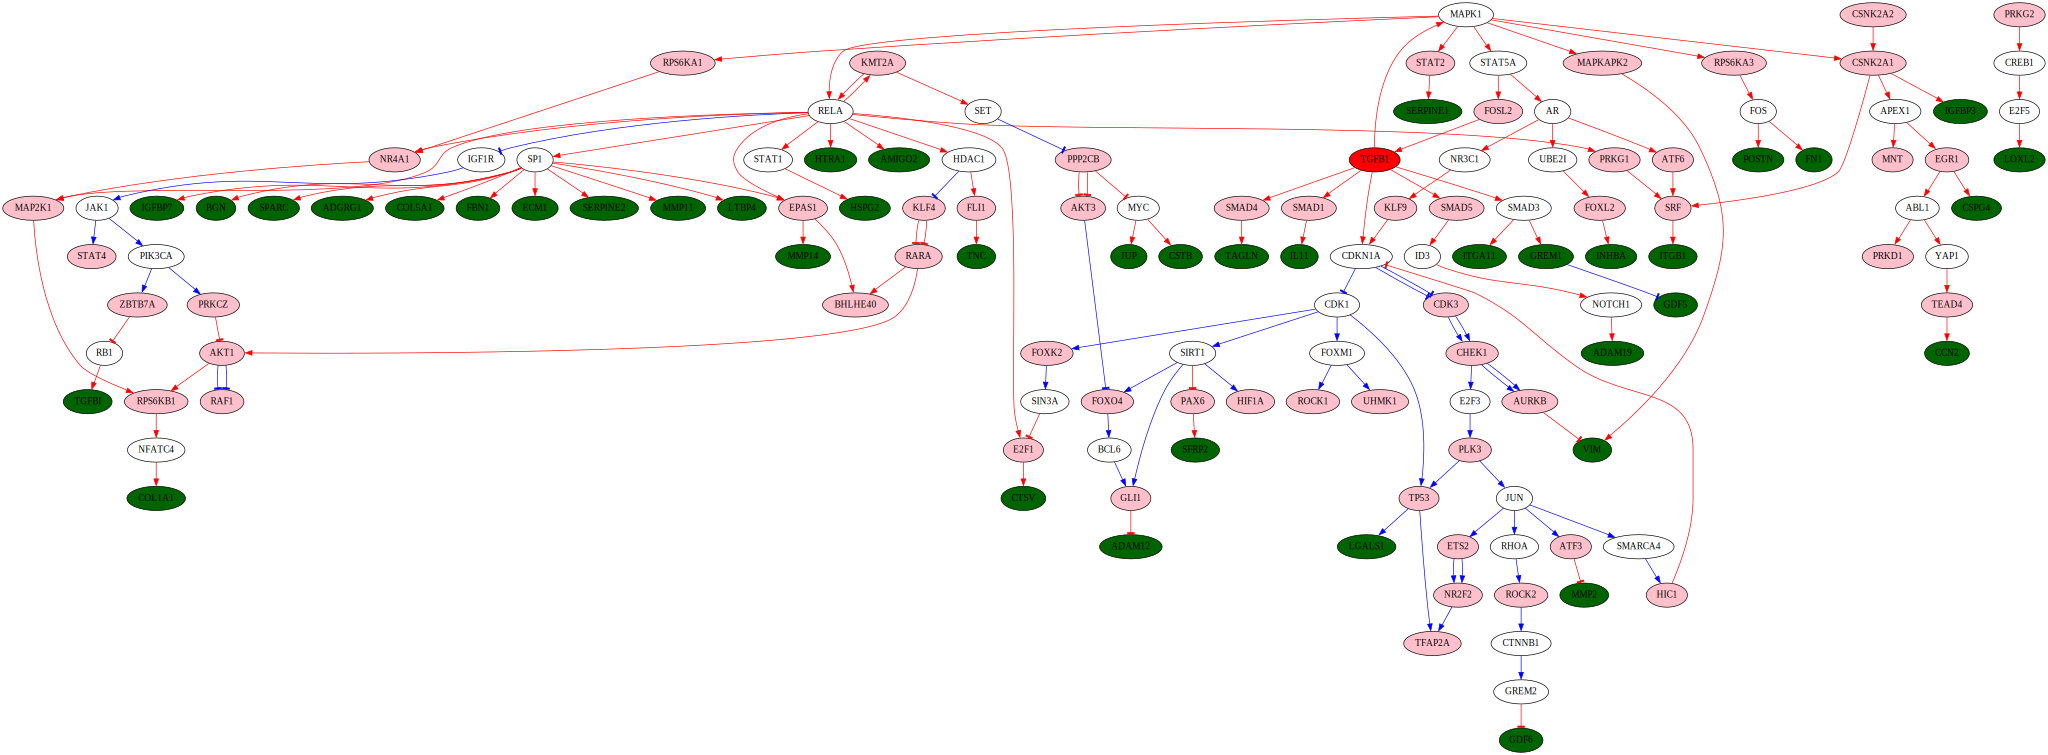

In [7]:
combinededges_df = pd.concat([edges_df, edges_df_1], axis=0, ignore_index=True)
combinededges_df = combinededges_df.loc[~combinededges_df['edge'].str.contains('meas|pert')]
combinededges_df.to_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/combinededges_df.tsv', sep='\t', index=False)

import graphviz

toplot = combinededges_df.copy()
# separate the edge column from the edge df into source, mor and target
toplot[['source', 'mor', 'target']] = toplot['edge'].str.split('--', expand=True)
# remove rows with null values in the mor values
toplot = toplot[toplot['mor'].notnull()]
# make the mor column numeric after removing parentheses
toplot['mor'] = toplot['mor'].str.replace('(', '').str.replace(')', '').astype(float)
toplot["arrowhead"] = toplot["mor"].apply(lambda x: "normal" if x == 1 else "tee")
# define color using the values of 'value' column, red for negative values and green for positive values
toplot["color"] = toplot["value"].apply(lambda x: "blue" if x < 0 else "red")


# create graphviz object
g = graphviz.Digraph()

# iterate over the rows of the df
for index, row in toplot.iterrows():
    # add source node using "source", "source_shape", "source_fillcolor" columns
    g.node(row["source"])
    # add target node using "target", "target_shape", "target_fillcolor" columns
    g.node(row["target"])
    # add edge using "source", "target", "arrowhead" columns
    g.edge(row["source"], row["target"], arrowhead=row["arrowhead"], color = row["color"])


p = ["TGFB1"]

i = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df.csv')
i = set(i['source']).intersection(set(toplot['source']).union(set(toplot['target'])))

m = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/secretome_df.csv')
m = set(m['id']).intersection(set(toplot['source']).union(set(toplot['target'])))


# Set the color attribute of the nodes
for node_name in p:
    g.node(node_name, style='filled', fillcolor='red')
for node_name in i:
    g.node(node_name, style='filled', fillcolor='pink')
for node_name in m:
    g.node(node_name, style='filled', fillcolor='darkgreen') 


g

# Run 3

In [8]:
# the reduced cosmos network
rn = cnt.ReNet.from_sif('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/pkn_df_late.tsv', delimiter='\t', has_header=True)

In [9]:
meas_df = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df_late.csv')
pert_df = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/perturbation_df_late.csv')

#Convert to dictionaries which are the required input format.
measurements = meas_df.set_index('source')['score'].to_dict()
perturbations = pert_df.set_index('id')['score'].to_dict()

#Create corneto data and corneto net object.
corneto_data = {}
for key, value in perturbations.items():
    corneto_data[key] = ('P', value)
for key, value in measurements.items():
    corneto_data[key] = ('M', value)

# prepare a final input for a single condition
corneto_data_input = {"C1": corneto_data}

# create corneto CARNIVAL net object
carnival_net = carnival_renet(rn, corneto_data_input)

# Create problem object.
# create corneto CARNIVAL problem object
cp = carnival(carnival_net, corneto_data_input, l0_penalty_reaction = 0.2, flow_implies_signal=False)

# solve
cp.solve(verbosity=1, TimeLimit=500)

# extract node df and edge df
nodes_df_2 = pd.DataFrame({'node': carnival_net.species, 'value': cp.symbols['species_activated_C1'].value - cp.symbols['species_inhibited_C1'].value})
nodes_df_2 = nodes_df_2[nodes_df_2['value'] != 0]
edges_df_2 = pd.DataFrame({'edge': carnival_net.reactions, 'value': cp.symbols['reaction_sends_activation_C1'].value - cp.symbols['reaction_sends_inhibition_C1'].value})
edges_df_2 = edges_df_2[edges_df_2['value'] != 0]



                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 04:04:50 PM: Your problem has 120586 variables, 33 constraints, and 0 parameters.
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 04:04:50 PM: Your problem has 120586 variables, 33 constraints, and 0 parameters.


(CVXPY) Jul 24 04:04:50 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 24 04:04:50 PM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) Jul 24 04:04:50 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 24 04:04:50 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)


(CVXPY) Jul 24 04:04:50 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 24 04:04:50 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:04:50 PM: Compiling problem (target solver=GUROBI).
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:04:50 PM: Compiling problem (target solver=GUROBI).


(CVXPY) Jul 24 04:04:50 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI
(CVXPY) Jul 24 04:04:50 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI


(CVXPY) Jul 24 04:04:50 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 24 04:04:50 PM: Applying reduction CvxAttr2Constr


(CVXPY) Jul 24 04:04:50 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Jul 24 04:04:50 PM: Applying reduction Qp2SymbolicQp


(CVXPY) Jul 24 04:04:50 PM: Applying reduction QpMatrixStuffing
(CVXPY) Jul 24 04:04:50 PM: Applying reduction QpMatrixStuffing


(CVXPY) Jul 24 04:04:52 PM: Applying reduction GUROBI
(CVXPY) Jul 24 04:04:52 PM: Applying reduction GUROBI


(CVXPY) Jul 24 04:04:52 PM: Finished problem compilation (took 1.649e+00 seconds).
(CVXPY) Jul 24 04:04:52 PM: Finished problem compilation (took 1.649e+00 seconds).


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:04:52 PM: Invoking solver GUROBI  to obtain a solution.
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:04:52 PM: Invoking solver GUROBI  to obtain a solution.


Set parameter QCPDual to value 1
Set parameter QCPDual to value 1


Set parameter TimeLimit to value 500
Set parameter TimeLimit to value 500


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])


CPU model: Apple M2 Pro
CPU model: Apple M2 Pro


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


Optimize a model with 477112 rows, 120586 columns and 897825 nonzeros
Optimize a model with 477112 rows, 120586 columns and 897825 nonzeros


Model fingerprint: 0xba9e5e14
Model fingerprint: 0xba9e5e14


Variable types: 30849 continuous, 89737 integer (89737 binary)
Variable types: 30849 continuous, 89737 integer (89737 binary)


Coefficient statistics:
Coefficient statistics:


  Matrix range     [1e-03, 3e+03]
  Matrix range     [1e-03, 3e+03]


  Objective range  [2e-01, 9e+00]
  Objective range  [2e-01, 9e+00]


  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]


  RHS range        [1e-03, 3e+03]
  RHS range        [1e-03, 3e+03]


Presolve removed 308024 rows and 7039 columns
Presolve removed 308024 rows and 7039 columns


Presolve time: 1.38s
Presolve time: 1.38s


Presolved: 169088 rows, 113547 columns, 518579 nonzeros
Presolved: 169088 rows, 113547 columns, 518579 nonzeros


Variable types: 29416 continuous, 84131 integer (84131 binary)
Variable types: 29416 continuous, 84131 integer (84131 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...
Showing barrier log only...


Root barrier log...
Root barrier log...


Ordering time: 2.14s
Ordering time: 2.14s


Ordering time: 3.53s
Ordering time: 3.53s


Barrier statistics:
Barrier statistics:


 Dense cols : 1662
 Dense cols : 1662


 AA' NZ     : 9.264e+05
 AA' NZ     : 9.264e+05


 Factor NZ  : 1.936e+07 (roughly 270 MB of memory)
 Factor NZ  : 1.936e+07 (roughly 270 MB of memory)


 Factor Ops : 4.362e+10 (less than 1 second per iteration)
 Factor Ops : 4.362e+10 (less than 1 second per iteration)


 Threads    : 9
 Threads    : 9


                  Objective                Residual
                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time
Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.33307470e+05 -2.68141646e+07  5.10e+04 2.63e+00  9.44e+02     6s
   0   3.33307470e+05 -2.68141646e+07  5.10e+04 2.63e+00  9.44e+02     6s


   1   2.80301212e+05 -2.33998310e+07  3.47e+04 2.75e+00  5.87e+02     6s
   1   2.80301212e+05 -2.33998310e+07  3.47e+04 2.75e+00  5.87e+02     6s


   2   1.82462334e+05 -1.89078085e+07  2.12e+04 6.64e-01  3.59e+02     6s
   2   1.82462334e+05 -1.89078085e+07  2.12e+04 6.64e-01  3.59e+02     6s


   3   3.21665701e+04 -1.01803909e+07  3.24e+03 4.54e-02  6.71e+01     7s
   3   3.21665701e+04 -1.01803909e+07  3.24e+03 4.54e-02  6.71e+01     7s


   4   6.42532797e+03 -1.43849525e+06  2.33e+02 2.94e-02  5.85e+00     7s
   4   6.42532797e+03 -1.43849525e+06  2.33e+02 2.94e-02  5.85e+00     7s


   5   5.49188883e+03 -6.18808020e+05  1.32e+02 7.99e-02  2.31e+00     7s
   5   5.49188883e+03 -6.18808020e+05  1.32e+02 7.99e-02  2.31e+00     7s


   6   4.27349223e+03 -1.66194462e+05  9.19e+00 5.41e-02  4.55e-01     8s
   6   4.27349223e+03 -1.66194462e+05  9.19e+00 5.41e-02  4.55e-01     8s


   7   3.97221974e+03 -1.40572217e+04  1.01e-03 4.13e-03  4.58e-02     8s
   7   3.97221974e+03 -1.40572217e+04  1.01e-03 4.13e-03  4.58e-02     8s


   8   2.10647847e+03 -1.89877582e+03  1.84e-04 7.20e-04  1.02e-02     8s
   8   2.10647847e+03 -1.89877582e+03  1.84e-04 7.20e-04  1.02e-02     8s


   9   7.04409183e+02 -8.19035132e+02  4.40e-05 2.23e-04  3.87e-03     9s
   9   7.04409183e+02 -8.19035132e+02  4.40e-05 2.23e-04  3.87e-03     9s


  10   3.36305633e+02 -5.90239199e+02  2.75e-05 1.46e-04  2.35e-03     9s
  10   3.36305633e+02 -5.90239199e+02  2.75e-05 1.46e-04  2.35e-03     9s


  11   1.05021058e+02 -4.29354602e+02  1.36e-05 8.43e-05  1.36e-03    10s
  11   1.05021058e+02 -4.29354602e+02  1.36e-05 8.43e-05  1.36e-03    10s


Barrier performed 11 iterations in 9.51 seconds (17.10 work units)
Barrier performed 11 iterations in 9.51 seconds (17.10 work units)


Barrier solve interrupted - model solved by another algorithm
Barrier solve interrupted - model solved by another algorithm


Concurrent spin time: 0.98s (can be avoided by choosing Method=3)
Concurrent spin time: 0.98s (can be avoided by choosing Method=3)


Solved with primal simplex
Solved with primal simplex


Root simplex log...
Root simplex log...


Iteration    Objective       Primal Inf.    Dual Inf.      Time
Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26267   -2.0870392e+02   0.000000e+00   0.000000e+00     10s
   26267   -2.0870392e+02   0.000000e+00   0.000000e+00     10s


Root relaxation: objective -2.087039e+02, 26267 iterations, 8.22 seconds (15.82 work units)
Root relaxation: objective -2.087039e+02, 26267 iterations, 8.22 seconds (15.82 work units)


    Nodes    |    Current Node    |     Objective Bounds      |     Work
    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


     0     0 -208.70392    0  306          - -208.70392      -     -   11s
     0     0 -208.70392    0  306          - -208.70392      -     -   11s


H    0     0                     -38.7663754 -208.70392   438%     -   11s
H    0     0                     -38.7663754 -208.70392   438%     -   11s


H    0     0                    -201.1042575 -208.70392  3.78%     -   13s
H    0     0                    -201.1042575 -208.70392  3.78%     -   13s


     0     0 -208.10388    0  419 -201.10426 -208.10388  3.48%     -   17s
     0     0 -208.10388    0  419 -201.10426 -208.10388  3.48%     -   17s


H    0     0                    -204.7042575 -208.10388  1.66%     -   22s
H    0     0                    -204.7042575 -208.10388  1.66%     -   22s


     0     0 -208.10388    0  422 -204.70426 -208.10388  1.66%     -   23s
     0     0 -208.10388    0  422 -204.70426 -208.10388  1.66%     -   23s


     0     0 -208.00392    0  396 -204.70426 -208.00392  1.61%     -   28s
     0     0 -208.00392    0  396 -204.70426 -208.00392  1.61%     -   28s


     0     0 -208.00392    0  395 -204.70426 -208.00392  1.61%     -   30s
     0     0 -208.00392    0  395 -204.70426 -208.00392  1.61%     -   30s


     0     0 -207.73734    0  326 -204.70426 -207.73734  1.48%     -   33s
     0     0 -207.73734    0  326 -204.70426 -207.73734  1.48%     -   33s


     0     0 -207.67070    0  337 -204.70426 -207.67070  1.45%     -   34s
     0     0 -207.67070    0  337 -204.70426 -207.67070  1.45%     -   34s


     0     0 -207.53741    0  336 -204.70426 -207.53741  1.38%     -   35s
     0     0 -207.53741    0  336 -204.70426 -207.53741  1.38%     -   35s


     0     0 -207.53741    0  362 -204.70426 -207.53741  1.38%     -   36s
     0     0 -207.53741    0  362 -204.70426 -207.53741  1.38%     -   36s


     0     0 -207.35409    0  396 -204.70426 -207.35409  1.29%     -   38s
     0     0 -207.35409    0  396 -204.70426 -207.35409  1.29%     -   38s


     0     0 -207.25411    0  397 -204.70426 -207.25411  1.25%     -   41s
     0     0 -207.25411    0  397 -204.70426 -207.25411  1.25%     -   41s


     0     0 -207.25411    0  398 -204.70426 -207.25411  1.25%     -   42s
     0     0 -207.25411    0  398 -204.70426 -207.25411  1.25%     -   42s


     0     0 -207.18748    0  341 -204.70426 -207.18748  1.21%     -   44s
     0     0 -207.18748    0  341 -204.70426 -207.18748  1.21%     -   44s


     0     0 -207.18748    0  395 -204.70426 -207.18748  1.21%     -   45s
     0     0 -207.18748    0  395 -204.70426 -207.18748  1.21%     -   45s


     0     0 -207.03748    0  438 -204.70426 -207.03748  1.14%     -   47s
     0     0 -207.03748    0  438 -204.70426 -207.03748  1.14%     -   47s


     0     0 -207.03748    0  402 -204.70426 -207.03748  1.14%     -   54s
     0     0 -207.03748    0  402 -204.70426 -207.03748  1.14%     -   54s


     0     0 -207.03747    0  356 -204.70426 -207.03747  1.14%     -   55s
     0     0 -207.03747    0  356 -204.70426 -207.03747  1.14%     -   55s


     0     0 -207.03747    0  347 -204.70426 -207.03747  1.14%     -   56s
     0     0 -207.03747    0  347 -204.70426 -207.03747  1.14%     -   56s


     0     0 -207.03747    0  360 -204.70426 -207.03747  1.14%     -   57s
     0     0 -207.03747    0  360 -204.70426 -207.03747  1.14%     -   57s


     0     0 -207.00046    0  399 -204.70426 -207.00046  1.12%     -   58s
     0     0 -207.00046    0  399 -204.70426 -207.00046  1.12%     -   58s


     0     0 -206.99917    0  352 -204.70426 -206.99917  1.12%     -   59s
     0     0 -206.99917    0  352 -204.70426 -206.99917  1.12%     -   59s


     0     0 -206.99917    0  361 -204.70426 -206.99917  1.12%     -   59s
     0     0 -206.99917    0  361 -204.70426 -206.99917  1.12%     -   59s


     0     0 -206.99917    0  383 -204.70426 -206.99917  1.12%     -   60s
     0     0 -206.99917    0  383 -204.70426 -206.99917  1.12%     -   60s


     0     0 -206.99917    0  385 -204.70426 -206.99917  1.12%     -   62s
     0     0 -206.99917    0  385 -204.70426 -206.99917  1.12%     -   62s


     0     0 -206.90417    0  376 -204.70426 -206.90417  1.07%     -   63s
     0     0 -206.90417    0  376 -204.70426 -206.90417  1.07%     -   63s


     0     0 -206.90417    0  351 -204.70426 -206.90417  1.07%     -   64s
     0     0 -206.90417    0  351 -204.70426 -206.90417  1.07%     -   64s


     0     0 -206.88544    0  388 -204.70426 -206.88544  1.07%     -   66s
     0     0 -206.88544    0  388 -204.70426 -206.88544  1.07%     -   66s


     0     0 -206.87363    0  383 -204.70426 -206.87363  1.06%     -   67s
     0     0 -206.87363    0  383 -204.70426 -206.87363  1.06%     -   67s


     0     0 -206.84953    0  400 -204.70426 -206.84953  1.05%     -   68s
     0     0 -206.84953    0  400 -204.70426 -206.84953  1.05%     -   68s


     0     0 -206.84537    0  366 -204.70426 -206.84537  1.05%     -   68s
     0     0 -206.84537    0  366 -204.70426 -206.84537  1.05%     -   68s


     0     0 -206.84537    0  419 -204.70426 -206.84537  1.05%     -   68s
     0     0 -206.84537    0  419 -204.70426 -206.84537  1.05%     -   68s


     0     0 -206.80423    0  397 -204.70426 -206.80423  1.03%     -   69s
     0     0 -206.80423    0  397 -204.70426 -206.80423  1.03%     -   69s


     0     0 -206.80423    0  402 -204.70426 -206.80423  1.03%     -   71s
     0     0 -206.80423    0  402 -204.70426 -206.80423  1.03%     -   71s


     0     0 -206.68480    0  466 -204.70426 -206.68480  0.97%     -   73s
     0     0 -206.68480    0  466 -204.70426 -206.68480  0.97%     -   73s


     0     0 -206.68480    0  461 -204.70426 -206.68480  0.97%     -   74s
     0     0 -206.68480    0  461 -204.70426 -206.68480  0.97%     -   74s


     0     0 -206.68202    0  462 -204.70426 -206.68202  0.97%     -   75s
     0     0 -206.68202    0  462 -204.70426 -206.68202  0.97%     -   75s


     0     0 -206.68202    0  478 -204.70426 -206.68202  0.97%     -   76s
     0     0 -206.68202    0  478 -204.70426 -206.68202  0.97%     -   76s


     0     0 -206.67271    0  479 -204.70426 -206.67271  0.96%     -   78s
     0     0 -206.67271    0  479 -204.70426 -206.67271  0.96%     -   78s


     0     0 -206.67271    0  464 -204.70426 -206.67271  0.96%     -   79s
     0     0 -206.67271    0  464 -204.70426 -206.67271  0.96%     -   79s


     0     0 -206.67149    0  495 -204.70426 -206.67149  0.96%     -   81s
     0     0 -206.67149    0  495 -204.70426 -206.67149  0.96%     -   81s


     0     0 -206.67149    0  458 -204.70426 -206.67149  0.96%     -   86s
     0     0 -206.67149    0  458 -204.70426 -206.67149  0.96%     -   86s


     0     0 -206.67148    0  483 -204.70426 -206.67148  0.96%     -   88s
     0     0 -206.67148    0  483 -204.70426 -206.67148  0.96%     -   88s


     0     0 -206.67147    0  475 -204.70426 -206.67147  0.96%     -   89s
     0     0 -206.67147    0  475 -204.70426 -206.67147  0.96%     -   89s


     0     0 -206.67147    0  506 -204.70426 -206.67147  0.96%     -   90s
     0     0 -206.67147    0  506 -204.70426 -206.67147  0.96%     -   90s


     0     0 -206.67147    0  290 -204.70426 -206.67147  0.96%     -   92s
     0     0 -206.67147    0  290 -204.70426 -206.67147  0.96%     -   92s


     0     2 -206.50427    0  283 -204.70426 -206.50427  0.88%     -  107s
     0     2 -206.50427    0  283 -204.70426 -206.50427  0.88%     -  107s


     7    16 -206.50427    3  335 -204.70426 -206.50427  0.88%  3780  110s
     7    16 -206.50427    3  335 -204.70426 -206.50427  0.88%  3780  110s


    51    64 -206.44899    7  339 -204.70426 -206.44899  0.85%  1443  115s
    51    64 -206.44899    7  339 -204.70426 -206.44899  0.85%  1443  115s


   103   116 -206.30423   10  317 -204.70426 -206.44675  0.85%   992  121s
   103   116 -206.30423   10  317 -204.70426 -206.44675  0.85%   992  121s


   164   186 -206.30423   13  282 -204.70426 -206.44675  0.85%   744  126s
   164   186 -206.30423   13  282 -204.70426 -206.44675  0.85%   744  126s


   252   270 -206.30407   20  250 -204.70426 -206.44675  0.85%   583  131s
   252   270 -206.30407   20  250 -204.70426 -206.44675  0.85%   583  131s


   366   382 -206.30406   27  254 -204.70426 -206.44675  0.85%   449  135s
   366   382 -206.30406   27  254 -204.70426 -206.44675  0.85%   449  135s


   462   484 -206.10404   40  194 -204.70426 -206.44675  0.85%   425  141s
   462   484 -206.10404   40  194 -204.70426 -206.44675  0.85%   425  141s


   552   565 -206.10398   51  221 -204.70426 -206.44675  0.85%   388  145s
   552   565 -206.10398   51  221 -204.70426 -206.44675  0.85%   388  145s


   724   722 -206.10396   69  135 -204.70426 -206.44675  0.85%   350  150s
   724   722 -206.10396   69  135 -204.70426 -206.44675  0.85%   350  150s


   838   797 -205.70402   77  153 -204.70426 -206.44675  0.85%   337  159s
   838   797 -205.70402   77  153 -204.70426 -206.44675  0.85%   337  159s


   855   870 -205.70402   78  163 -204.70426 -206.44675  0.85%   348  162s
   855   870 -205.70402   78  163 -204.70426 -206.44675  0.85%   348  162s


  1004  1011 -205.70401   88  135 -204.70426 -206.44675  0.85%   324  166s
  1004  1011 -205.70401   88  135 -204.70426 -206.44675  0.85%   324  166s


  1145  1153 -205.30400  107  138 -204.70426 -206.44675  0.85%   304  172s
  1145  1153 -205.30400  107  138 -204.70426 -206.44675  0.85%   304  172s


  1225  1222 -205.10400  113  142 -204.70426 -206.44675  0.85%   299  176s
  1225  1222 -205.10400  113  142 -204.70426 -206.44675  0.85%   299  176s


  1396  1354 -204.90398  125  151 -204.70426 -206.44132  0.85%   294  181s
  1396  1354 -204.90398  125  151 -204.70426 -206.44132  0.85%   294  181s


  1569  1532 -205.97557   12  229 -204.70426 -206.44132  0.85%   294  187s
  1569  1532 -205.97557   12  229 -204.70426 -206.44132  0.85%   294  187s


  1701  1626 -205.95414   16  220 -204.70426 -206.44132  0.85%   288  192s
  1701  1626 -205.95414   16  220 -204.70426 -206.44132  0.85%   288  192s


  1830  1734 -205.70414   21  186 -204.70426 -206.44132  0.85%   285  196s
  1830  1734 -205.70414   21  186 -204.70426 -206.44132  0.85%   285  196s


  2075  1933 -205.10414   38  175 -204.70426 -206.44132  0.85%   282  204s
  2075  1933 -205.10414   38  175 -204.70426 -206.44132  0.85%   282  204s


  2203  1934 -205.90400   49  290 -204.70426 -206.44132  0.85%   284  210s
  2203  1934 -205.90400   49  290 -204.70426 -206.44132  0.85%   284  210s


  2205  1935 -205.50408   60  291 -204.70426 -206.44132  0.85%   284  218s
  2205  1935 -205.50408   60  291 -204.70426 -206.44132  0.85%   284  218s


  2206  1936 -204.90418   71  462 -204.70426 -206.44132  0.85%   284  227s
  2206  1936 -204.90418   71  462 -204.70426 -206.44132  0.85%   284  227s


  2207  1937 -206.10400   82  411 -204.70426 -206.44132  0.85%   284  230s
  2207  1937 -206.10400   82  411 -204.70426 -206.44132  0.85%   284  230s


  2210  1939 -206.24847   13  400 -204.70426 -206.44132  0.85%   283  237s
  2210  1939 -206.24847   13  400 -204.70426 -206.44132  0.85%   283  237s


  2214  1941 -206.10412   30  432 -204.70426 -206.40422  0.83%   283  243s
  2214  1941 -206.10412   30  432 -204.70426 -206.40422  0.83%   283  243s


  2216  1943 -206.06447   11  475 -204.70426 -206.24680  0.75%   282  245s
  2216  1943 -206.06447   11  475 -204.70426 -206.24680  0.75%   282  245s


  2221  1946 -205.50406   95  396 -204.70426 -206.02803  0.65%   282  250s
  2221  1946 -205.50406   95  396 -204.70426 -206.02803  0.65%   282  250s


  2224  1948 -204.80407   93  400 -204.70426 -205.68754  0.48%   281  258s
  2224  1948 -204.80407   93  400 -204.70426 -205.68754  0.48%   281  258s


  2225  1949 -205.50412   68  400 -204.70426 -205.68754  0.48%   281  261s
  2225  1949 -205.50412   68  400 -204.70426 -205.68754  0.48%   281  261s


  2226  1949 -204.90405  110  266 -204.70426 -205.55729  0.42%   281  268s
  2226  1949 -204.90405  110  266 -204.70426 -205.55729  0.42%   281  268s


  2228  1951 -205.54220   24  274 -204.70426 -205.54220  0.41%   281  271s
  2228  1951 -205.54220   24  274 -204.70426 -205.54220  0.41%   281  271s


  2230  1952 -204.90420   61  219 -204.70426 -205.39490  0.34%   281  277s
  2230  1952 -204.90420   61  219 -204.70426 -205.39490  0.34%   281  277s


  2232  1953 -205.22090   18  138 -204.70426 -205.22090  0.25%   280  287s
  2232  1953 -205.22090   18  138 -204.70426 -205.22090  0.25%   280  287s


  2234  1955 -205.17092   41   77 -204.70426 -205.17092  0.23%   280  292s
  2234  1955 -205.17092   41   77 -204.70426 -205.17092  0.23%   280  292s


  2237  1957 -204.90422   52  193 -204.70426 -205.14870  0.22%   280  305s
  2237  1957 -204.90422   52  193 -204.70426 -205.14870  0.22%   280  305s


  2239  1958 -205.14426   47  167 -204.70426 -205.14426  0.21%   280  316s
  2239  1958 -205.14426   47  167 -204.70426 -205.14426  0.21%   280  316s


  2240  1959 -205.14426   70  217 -204.70426 -205.14426  0.21%   279  320s
  2240  1959 -205.14426   70  217 -204.70426 -205.14426  0.21%   279  320s


  2241  1959 -205.14426   54  151 -204.70426 -205.14426  0.21%   279  329s
  2241  1959 -205.14426   54  151 -204.70426 -205.14426  0.21%   279  329s


  2242  1960 -205.14426  100  187 -204.70426 -205.14426  0.21%   279  330s
  2242  1960 -205.14426  100  187 -204.70426 -205.14426  0.21%   279  330s


  2243  1961 -205.14426   51  125 -204.70426 -205.14426  0.21%   279  340s
  2243  1961 -205.14426   51  125 -204.70426 -205.14426  0.21%   279  340s


H 2244  1862                    -204.7042576 -205.14424  0.21%   279  349s
H 2244  1862                    -204.7042576 -205.14424  0.21%   279  349s


  2246  1864 -205.14424   42  148 -204.70426 -205.14424  0.21%   279  350s
  2246  1864 -205.14424   42  148 -204.70426 -205.14424  0.21%   279  350s


  2247  1864 -205.14423   25  142 -204.70426 -205.14423  0.21%   279  359s
  2247  1864 -205.14423   25  142 -204.70426 -205.14423  0.21%   279  359s


  2248  1865 -205.10398  118  246 -204.70426 -205.14423  0.21%   278  363s
  2248  1865 -205.10398  118  246 -204.70426 -205.14423  0.21%   278  363s


  2249  1866 -205.14423   59  241 -204.70426 -205.14423  0.21%   278  368s
  2249  1866 -205.14423   59  241 -204.70426 -205.14423  0.21%   278  368s


  2250  1866 -205.14422   16  254 -204.70426 -205.14422  0.21%   278  371s
  2250  1866 -205.14422   16  254 -204.70426 -205.14422  0.21%   278  371s


  2251  1867 -205.04424   85  157 -204.70426 -205.04424  0.17%   278  376s
  2251  1867 -205.04424   85  157 -204.70426 -205.04424  0.17%   278  376s


  2253  1868 -205.03757   28   57 -204.70426 -205.03757  0.16%   278  392s
  2253  1868 -205.03757   28   57 -204.70426 -205.03757  0.16%   278  392s


  2254  1869 -205.03231   55  128 -204.70426 -205.03231  0.16%   278  395s
  2254  1869 -205.03231   55  128 -204.70426 -205.03231  0.16%   278  395s


  2257  1871 -204.99091   27  225 -204.70426 -204.99091  0.14%   277  403s
  2257  1871 -204.99091   27  225 -204.70426 -204.99091  0.14%   277  403s


  2259  1872 -204.98463   80  229 -204.70426 -204.98463  0.14%   277  416s
  2259  1872 -204.98463   80  229 -204.70426 -204.98463  0.14%   277  416s


  2261  1874 -204.93757  108  133 -204.70426 -204.93757  0.11%   277  422s
  2261  1874 -204.93757  108  133 -204.70426 -204.93757  0.11%   277  422s


  2263  1875 -204.93756   14  131 -204.70426 -204.93756  0.11%   277  432s
  2263  1875 -204.93756   14  131 -204.70426 -204.93756  0.11%   277  432s


  2264  1876 -204.93756   73  206 -204.70426 -204.93756  0.11%   276  435s
  2264  1876 -204.93756   73  206 -204.70426 -204.93756  0.11%   276  435s


  2265  1876 -204.93756   61   62 -204.70426 -204.93756  0.11%   276  441s
  2265  1876 -204.93756   61   62 -204.70426 -204.93756  0.11%   276  441s


  2267  1878 -204.90420   88   77 -204.70426 -204.93756  0.11%   276  447s
  2267  1878 -204.90420   88   77 -204.70426 -204.93756  0.11%   276  447s


  2269  1879 -204.93756  136   48 -204.70426 -204.93756  0.11%   276  452s
  2269  1879 -204.93756  136   48 -204.70426 -204.93756  0.11%   276  452s


  2271  1880 -204.90424   13   95 -204.70426 -204.90424  0.10%   276  457s
  2271  1880 -204.90424   13   95 -204.70426 -204.90424  0.10%   276  457s


Explored 2275 nodes (1557116 simplex iterations) in 458.60 seconds (775.49 work units)
Explored 2275 nodes (1557116 simplex iterations) in 458.60 seconds (775.49 work units)


Thread count was 12 (of 12 available processors)
Thread count was 12 (of 12 available processors)


Solution count 4: -204.704 -204.704 -201.104 -38.7664 
Solution count 4: -204.704 -204.704 -201.104 -38.7664 


No other solutions better than -204.704
No other solutions better than -204.704


Optimal solution found (tolerance 1.00e-04)
Optimal solution found (tolerance 1.00e-04)


Best objective -2.047042576518e+02, best bound -2.047042576518e+02, gap 0.0000%
Best objective -2.047042576518e+02, best bound -2.047042576518e+02, gap 0.0000%


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:12:32 PM: Problem status: optimal
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:12:32 PM: Problem status: optimal


(CVXPY) Jul 24 04:12:32 PM: Optimal value: 6.099e+01
(CVXPY) Jul 24 04:12:32 PM: Optimal value: 6.099e+01


(CVXPY) Jul 24 04:12:32 PM: Compilation took 1.649e+00 seconds
(CVXPY) Jul 24 04:12:32 PM: Compilation took 1.649e+00 seconds


(CVXPY) Jul 24 04:12:32 PM: Solver (including time spent in interface) took 4.598e+02 seconds
(CVXPY) Jul 24 04:12:32 PM: Solver (including time spent in interface) took 4.598e+02 seconds


<positron-console-cell-10>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


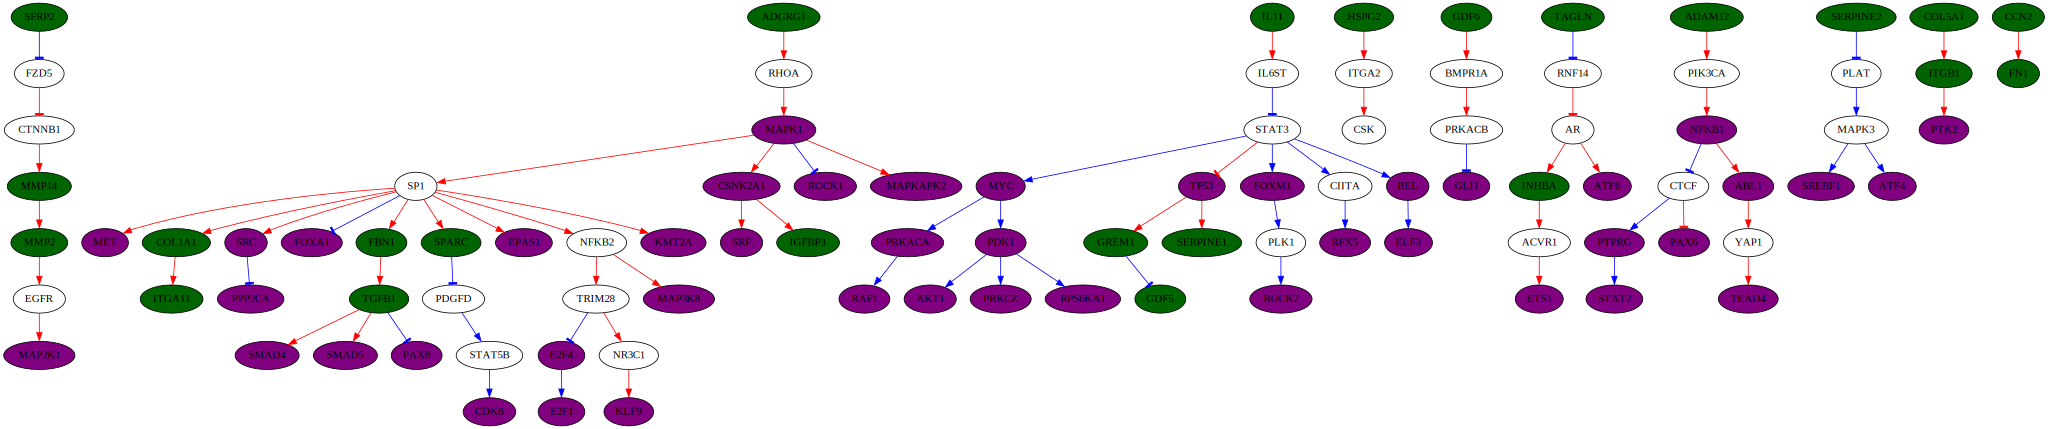

In [10]:
edges_df_2 = edges_df_2.loc[~edges_df_2['edge'].str.contains('meas|pert')]
import graphviz

toplot = edges_df_2.copy()
# separate the edge column from the edge df into source, mor and target
toplot[['source', 'mor', 'target']] = toplot['edge'].str.split('--', expand=True)
# remove rows with null values in the mor values
toplot = toplot[toplot['mor'].notnull()]
# make the mor column numeric after removing parentheses
toplot['mor'] = toplot['mor'].str.replace('(', '').str.replace(')', '').astype(float)
toplot["arrowhead"] = toplot["mor"].apply(lambda x: "normal" if x == 1 else "tee")
# define color using the values of 'value' column, red for negative values and green for positive values
toplot["color"] = toplot["value"].apply(lambda x: "blue" if x < 0 else "red")


# create graphviz object
g = graphviz.Digraph()

# iterate over the rows of the df
for index, row in toplot.iterrows():
    # add source node using "source", "source_shape", "source_fillcolor" columns
    g.node(row["source"])
    # add target node using "target", "target_shape", "target_fillcolor" columns
    g.node(row["target"])
    # add edge using "source", "target", "arrowhead" columns
    g.edge(row["source"], row["target"], arrowhead=row["arrowhead"], color = row["color"])


p = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/perturbation_df_late.csv')
p = set(p['id']).intersection(set(toplot['source']).union(set(toplot['target'])))

m = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df_late.csv')
m = set(m['source']).intersection(set(toplot['source']).union(set(toplot['target'])))


# Set the color attribute of the nodes
for node_name in p:
    g.node(node_name, style='filled', fillcolor='darkgreen')
for node_name in m:
    g.node(node_name, style='filled', fillcolor='purple') 

g

# Run 4

In [11]:
meas_df = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/secretome_df_late.csv')
pert_df = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df_late.csv')

#Convert to dictionaries which are the required input format.
measurements = meas_df.set_index('id')['score'].to_dict()
perturbations = pert_df.set_index('source')['score'].to_dict()

#Create corneto data and corneto net object.
corneto_data = {}
for key, value in perturbations.items():
    corneto_data[key] = ('P', value)
for key, value in measurements.items():
    corneto_data[key] = ('M', value)

# prepare a final input for a single condition
corneto_data_input = {"C1": corneto_data}

# create corneto CARNIVAL net object
carnival_net = carnival_renet(rn, corneto_data_input)

# Create problem object.
# create corneto CARNIVAL problem object
cp = carnival(carnival_net, corneto_data_input, l0_penalty_reaction = 0.2, flow_implies_signal=False)

# solve
cp.solve(verbosity=1, TimeLimit=500)

# extract node df and edge df
nodes_df_3 = pd.DataFrame({'node': carnival_net.species, 'value': cp.symbols['species_activated_C1'].value - cp.symbols['species_inhibited_C1'].value})
nodes_df_3 = nodes_df_3[nodes_df_3['value'] != 0]
edges_df_3 = pd.DataFrame({'edge': carnival_net.reactions, 'value': cp.symbols['reaction_sends_activation_C1'].value - cp.symbols['reaction_sends_inhibition_C1'].value})
edges_df_3 = edges_df_3[edges_df_3['value'] != 0]


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 04:12:48 PM: Your problem has 120722 variables, 33 constraints, and 0 parameters.
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 24 04:12:48 PM: Your problem has 120722 variables, 33 constraints, and 0 parameters.


(CVXPY) Jul 24 04:12:48 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 24 04:12:48 PM: It is compliant with the following grammars: DCP, DQCP


(CVXPY) Jul 24 04:12:48 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 24 04:12:48 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)


(CVXPY) Jul 24 04:12:48 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jul 24 04:12:48 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:12:48 PM: Compiling problem (target solver=GUROBI).
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:12:48 PM: Compiling problem (target solver=GUROBI).


(CVXPY) Jul 24 04:12:48 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI
(CVXPY) Jul 24 04:12:48 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> GUROBI


(CVXPY) Jul 24 04:12:48 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jul 24 04:12:48 PM: Applying reduction CvxAttr2Constr


(CVXPY) Jul 24 04:12:48 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Jul 24 04:12:48 PM: Applying reduction Qp2SymbolicQp


(CVXPY) Jul 24 04:12:48 PM: Applying reduction QpMatrixStuffing
(CVXPY) Jul 24 04:12:48 PM: Applying reduction QpMatrixStuffing


(CVXPY) Jul 24 04:12:50 PM: Applying reduction GUROBI
(CVXPY) Jul 24 04:12:50 PM: Applying reduction GUROBI


(CVXPY) Jul 24 04:12:50 PM: Finished problem compilation (took 1.625e+00 seconds).
(CVXPY) Jul 24 04:12:50 PM: Finished problem compilation (took 1.625e+00 seconds).


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:12:50 PM: Invoking solver GUROBI  to obtain a solution.
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:12:50 PM: Invoking solver GUROBI  to obtain a solution.


Set parameter QCPDual to value 1
Set parameter QCPDual to value 1


Set parameter TimeLimit to value 500
Set parameter TimeLimit to value 500


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])


CPU model: Apple M2 Pro
CPU model: Apple M2 Pro


Thread count: 12 physical cores, 12 logical processors, using up to 12 threads
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads


Optimize a model with 477614 rows, 120722 columns and 898921 nonzeros
Optimize a model with 477614 rows, 120722 columns and 898921 nonzeros


Model fingerprint: 0x1d57d028
Model fingerprint: 0x1d57d028


Variable types: 30883 continuous, 89839 integer (89839 binary)
Variable types: 30883 continuous, 89839 integer (89839 binary)


Coefficient statistics:
Coefficient statistics:


  Matrix range     [1e-03, 3e+03]
  Matrix range     [1e-03, 3e+03]


  Objective range  [2e-01, 9e+00]
  Objective range  [2e-01, 9e+00]


  Bounds range     [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]


  RHS range        [1e-03, 3e+03]
  RHS range        [1e-03, 3e+03]


Presolve removed 307223 rows and 6360 columns
Presolve removed 307223 rows and 6360 columns


Presolve time: 1.38s
Presolve time: 1.38s


Presolved: 170391 rows, 114362 columns, 522349 nonzeros
Presolved: 170391 rows, 114362 columns, 522349 nonzeros


Variable types: 29687 continuous, 84675 integer (84671 binary)
Variable types: 29687 continuous, 84675 integer (84671 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...
Showing barrier log only...


Root barrier log...
Root barrier log...


Ordering time: 2.22s
Ordering time: 2.22s


Ordering time: 3.59s
Ordering time: 3.59s


Barrier statistics:
Barrier statistics:


 Dense cols : 1217
 Dense cols : 1217


 AA' NZ     : 1.060e+06
 AA' NZ     : 1.060e+06


 Factor NZ  : 2.971e+07 (roughly 350 MB of memory)
 Factor NZ  : 2.971e+07 (roughly 350 MB of memory)


 Factor Ops : 9.534e+10 (less than 1 second per iteration)
 Factor Ops : 9.534e+10 (less than 1 second per iteration)


 Threads    : 9
 Threads    : 9


Barrier performed 0 iterations in 5.97 seconds (7.81 work units)
Barrier performed 0 iterations in 5.97 seconds (7.81 work units)


Barrier solve interrupted - model solved by another algorithm
Barrier solve interrupted - model solved by another algorithm


Concurrent spin time: 1.86s (can be avoided by choosing Method=3)
Concurrent spin time: 1.86s (can be avoided by choosing Method=3)


Solved with dual simplex
Solved with dual simplex


Root simplex log...
Root simplex log...


Iteration    Objective       Primal Inf.    Dual Inf.      Time
Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19699   -2.5105291e+02   0.000000e+00   0.000000e+00      6s
   19699   -2.5105291e+02   0.000000e+00   0.000000e+00      6s


Root relaxation: objective -2.510529e+02, 19699 iterations, 4.17 seconds (4.30 work units)
Root relaxation: objective -2.510529e+02, 19699 iterations, 4.17 seconds (4.30 work units)


    Nodes    |    Current Node    |     Objective Bounds      |     Work
    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


     0     0 -251.05291    0  389          - -251.05291      -     -    8s
     0     0 -251.05291    0  389          - -251.05291      -     -    8s


H    0     0                    -226.6530681 -251.05291  10.8%     -    8s
H    0     0                    -226.6530681 -251.05291  10.8%     -    8s


H    0     0                    -242.5719611 -251.05291  3.50%     -   10s
H    0     0                    -242.5719611 -251.05291  3.50%     -   10s


     0     0 -250.54621    0  300 -242.57196 -250.54621  3.29%     -   12s
     0     0 -250.54621    0  300 -242.57196 -250.54621  3.29%     -   12s


H    0     0                    -248.3693756 -250.54621  0.88%     -   13s
H    0     0                    -248.3693756 -250.54621  0.88%     -   13s


H    0     0                    -249.2530681 -250.54621  0.52%     -   16s
H    0     0                    -249.2530681 -250.54621  0.52%     -   16s


     0     0 -250.23411    0  270 -249.25307 -250.23411  0.39%     -   18s
     0     0 -250.23411    0  270 -249.25307 -250.23411  0.39%     -   18s


     0     0 -250.13636    0  260 -249.25307 -250.13636  0.35%     -   20s
     0     0 -250.13636    0  260 -249.25307 -250.13636  0.35%     -   20s


     0     0 -250.13636    0  312 -249.25307 -250.13636  0.35%     -   20s
     0     0 -250.13636    0  312 -249.25307 -250.13636  0.35%     -   20s


     0     0 -250.08458    0  320 -249.25307 -250.08458  0.33%     -   22s
     0     0 -250.08458    0  320 -249.25307 -250.08458  0.33%     -   22s


     0     0 -250.07034    0  307 -249.25307 -250.07034  0.33%     -   23s
     0     0 -250.07034    0  307 -249.25307 -250.07034  0.33%     -   23s


     0     0 -250.07034    0  307 -249.25307 -250.07034  0.33%     -   23s
     0     0 -250.07034    0  307 -249.25307 -250.07034  0.33%     -   23s


     0     0 -250.06416    0  312 -249.25307 -250.06416  0.33%     -   24s
     0     0 -250.06416    0  312 -249.25307 -250.06416  0.33%     -   24s


     0     0 -250.06416    0  306 -249.25307 -250.06416  0.33%     -   25s
     0     0 -250.06416    0  306 -249.25307 -250.06416  0.33%     -   25s


     0     0 -250.04193    0  309 -249.25307 -250.04193  0.32%     -   26s
     0     0 -250.04193    0  309 -249.25307 -250.04193  0.32%     -   26s


     0     0 -250.03823    0  285 -249.25307 -250.03823  0.32%     -   26s
     0     0 -250.03823    0  285 -249.25307 -250.03823  0.32%     -   26s


     0     0 -250.03823    0  299 -249.25307 -250.03823  0.32%     -   27s
     0     0 -250.03823    0  299 -249.25307 -250.03823  0.32%     -   27s


     0     0 -250.03344    0  314 -249.25307 -250.03344  0.31%     -   28s
     0     0 -250.03344    0  314 -249.25307 -250.03344  0.31%     -   28s


     0     0 -250.03344    0  326 -249.25307 -250.03344  0.31%     -   32s
     0     0 -250.03344    0  326 -249.25307 -250.03344  0.31%     -   32s


     0     0 -250.03337    0  344 -249.25307 -250.03337  0.31%     -   33s
     0     0 -250.03337    0  344 -249.25307 -250.03337  0.31%     -   33s


     0     0 -250.03004    0  389 -249.25307 -250.03004  0.31%     -   34s
     0     0 -250.03004    0  389 -249.25307 -250.03004  0.31%     -   34s


     0     0 -250.03004    0  385 -249.25307 -250.03004  0.31%     -   34s
     0     0 -250.03004    0  385 -249.25307 -250.03004  0.31%     -   34s


     0     0 -250.01036    0  428 -249.25307 -250.01036  0.30%     -   36s
     0     0 -250.01036    0  428 -249.25307 -250.01036  0.30%     -   36s


     0     0 -250.01036    0  359 -249.25307 -250.01036  0.30%     -   37s
     0     0 -250.01036    0  359 -249.25307 -250.01036  0.30%     -   37s


     0     0 -249.94195    0  319 -249.25307 -249.94195  0.28%     -   38s
     0     0 -249.94195    0  319 -249.25307 -249.94195  0.28%     -   38s


     0     0 -249.94195    0  315 -249.25307 -249.94195  0.28%     -   39s
     0     0 -249.94195    0  315 -249.25307 -249.94195  0.28%     -   39s


     0     0 -249.89473    0  237 -249.25307 -249.89473  0.26%     -   41s
     0     0 -249.89473    0  237 -249.25307 -249.89473  0.26%     -   41s


     0     0 -249.89473    0  240 -249.25307 -249.89473  0.26%     -   41s
     0     0 -249.89473    0  240 -249.25307 -249.89473  0.26%     -   41s


     0     0 -249.84893    0  430 -249.25307 -249.84893  0.24%     -   43s
     0     0 -249.84893    0  430 -249.25307 -249.84893  0.24%     -   43s


     0     0 -249.83914    0  447 -249.25307 -249.83914  0.24%     -   45s
     0     0 -249.83914    0  447 -249.25307 -249.83914  0.24%     -   45s


     0     0 -249.83874    0  455 -249.25307 -249.83874  0.23%     -   46s
     0     0 -249.83874    0  455 -249.25307 -249.83874  0.23%     -   46s


     0     0 -249.83860    0  456 -249.25307 -249.83860  0.23%     -   47s
     0     0 -249.83860    0  456 -249.25307 -249.83860  0.23%     -   47s


     0     0 -249.83860    0  443 -249.25307 -249.83860  0.23%     -   47s
     0     0 -249.83860    0  443 -249.25307 -249.83860  0.23%     -   47s


     0     0 -249.83860    0  448 -249.25307 -249.83860  0.23%     -   48s
     0     0 -249.83860    0  448 -249.25307 -249.83860  0.23%     -   48s


     0     0 -249.83860    0  440 -249.25307 -249.83860  0.23%     -   49s
     0     0 -249.83860    0  440 -249.25307 -249.83860  0.23%     -   49s


     0     0 -249.83860    0  457 -249.25307 -249.83860  0.23%     -   50s
     0     0 -249.83860    0  457 -249.25307 -249.83860  0.23%     -   50s


     0     0 -249.83860    0  451 -249.25307 -249.83860  0.23%     -   51s
     0     0 -249.83860    0  451 -249.25307 -249.83860  0.23%     -   51s


     0     0 -249.83860    0  302 -249.25307 -249.83860  0.23%     -   58s
     0     0 -249.83860    0  302 -249.25307 -249.83860  0.23%     -   58s


     0     0 -249.83860    0  356 -249.25307 -249.83860  0.23%     -   63s
     0     0 -249.83860    0  356 -249.25307 -249.83860  0.23%     -   63s


     0     0 -249.83860    0  312 -249.25307 -249.83860  0.23%     -   69s
     0     0 -249.83860    0  312 -249.25307 -249.83860  0.23%     -   69s


     0     0 -249.83860    0  318 -249.25307 -249.83860  0.23%     -   70s
     0     0 -249.83860    0  318 -249.25307 -249.83860  0.23%     -   70s


     0     0 -249.83859    0  315 -249.25307 -249.83859  0.23%     -   75s
     0     0 -249.83859    0  315 -249.25307 -249.83859  0.23%     -   75s


     0     0 -249.83859    0  315 -249.25307 -249.83859  0.23%     -   76s
     0     0 -249.83859    0  315 -249.25307 -249.83859  0.23%     -   76s


H    0     0                    -249.2851054 -249.83859  0.22%     -   79s
H    0     0                    -249.2851054 -249.83859  0.22%     -   79s


     0     2 -249.72707    0  311 -249.28511 -249.72707  0.18%     -   88s
     0     2 -249.72707    0  311 -249.28511 -249.72707  0.18%     -   88s


     1     4 -249.72707    1  166 -249.28511 -249.72707  0.18%  3157   90s
     1     4 -249.72707    1  166 -249.28511 -249.72707  0.18%  3157   90s


    37    37 -249.69751    6  173 -249.28511 -249.71973  0.17%  1578   95s
    37    37 -249.69751    6  173 -249.28511 -249.71973  0.17%  1578   95s


   140   109 -249.65299   13  119 -249.28511 -249.68640  0.16%   580  100s
   140   109 -249.65299   13  119 -249.28511 -249.68640  0.16%   580  100s


   286   191 -249.65299   20  177 -249.28511 -249.68640  0.16%   343  105s
   286   191 -249.65299   20  177 -249.28511 -249.68640  0.16%   343  105s


   389   224 -249.35303   22  121 -249.28511 -249.68640  0.16%   348  111s
   389   224 -249.35303   22  121 -249.28511 -249.68640  0.16%   348  111s


   558   350 -249.45301   36  100 -249.28511 -249.68640  0.16%   318  115s
   558   350 -249.45301   36  100 -249.28511 -249.68640  0.16%   318  115s


   835   470 -249.45301   17  158 -249.28511 -249.68510  0.16%   251  120s
   835   470 -249.45301   17  158 -249.28511 -249.68510  0.16%   251  120s


  1050   557 -249.40776    8  127 -249.28511 -249.68505  0.16%   246  125s
  1050   557 -249.40776    8  127 -249.28511 -249.68505  0.16%   246  125s


  1385   700 -249.45303   32   86 -249.28511 -249.66654  0.15%   225  133s
  1385   700 -249.45303   32   86 -249.28511 -249.66654  0.15%   225  133s


  1397   814 -249.45303   33   78 -249.28511 -249.66654  0.15%   224  135s
  1397   814 -249.45303   33   78 -249.28511 -249.66654  0.15%   224  135s


  1808   925 -249.45303    9  315 -249.28511 -249.66654  0.15%   199  141s
  1808   925 -249.45303    9  315 -249.28511 -249.66654  0.15%   199  141s


  1810   926 -249.45301   23  331 -249.28511 -249.66654  0.15%   198  147s
  1810   926 -249.45301   23  331 -249.28511 -249.66654  0.15%   198  147s


  1811   927 -249.55304   23  382 -249.28511 -249.66654  0.15%   198  162s
  1811   927 -249.55304   23  382 -249.28511 -249.66654  0.15%   198  162s


  1814   929 -249.45296   12  468 -249.28511 -249.66654  0.15%   198  166s
  1814   929 -249.45296   12  468 -249.28511 -249.66654  0.15%   198  166s


  1816   930 -249.45303   26  127 -249.28511 -249.56931  0.11%   198  176s
  1816   930 -249.45303   26  127 -249.28511 -249.56931  0.11%   198  176s


H 1820   886                    -249.2851054 -249.51091  0.09%   197  185s
H 1820   886                    -249.2851054 -249.51091  0.09%   197  185s


Cutting planes:
Cutting planes:


  Learned: 4
  Learned: 4


  Gomory: 16
  Gomory: 16


  Cover: 28
  Cover: 28


  Implied bound: 27
  Implied bound: 27


  MIR: 2
  MIR: 2


  Flow cover: 93
  Flow cover: 93


  Zero half: 24
  Zero half: 24


  Mod-K: 1
  Mod-K: 1


  RLT: 9
  RLT: 9


  Relax-and-lift: 4
  Relax-and-lift: 4


Explored 1820 nodes (724866 simplex iterations) in 187.55 seconds (349.21 work units)
Explored 1820 nodes (724866 simplex iterations) in 187.55 seconds (349.21 work units)


Thread count was 12 (of 12 available processors)
Thread count was 12 (of 12 available processors)


Solution count 6: -249.285 -249.285 -249.253 ... -226.653
Solution count 6: -249.285 -249.285 -249.253 ... -226.653


No other solutions better than -249.285
No other solutions better than -249.285


Optimal solution found (tolerance 1.00e-04)
Optimal solution found (tolerance 1.00e-04)


Best objective -2.492851054425e+02, best bound -2.492851054441e+02, gap 0.0000%
Best objective -2.492851054425e+02, best bound -2.492851054441e+02, gap 0.0000%


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:15:59 PM: Problem status: optimal
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 24 04:15:59 PM: Problem status: optimal


(CVXPY) Jul 24 04:15:59 PM: Optimal value: 5.195e+01
(CVXPY) Jul 24 04:15:59 PM: Optimal value: 5.195e+01


(CVXPY) Jul 24 04:15:59 PM: Compilation took 1.625e+00 seconds
(CVXPY) Jul 24 04:15:59 PM: Compilation took 1.625e+00 seconds


(CVXPY) Jul 24 04:15:59 PM: Solver (including time spent in interface) took 1.889e+02 seconds
(CVXPY) Jul 24 04:15:59 PM: Solver (including time spent in interface) took 1.889e+02 seconds


<positron-console-cell-12>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


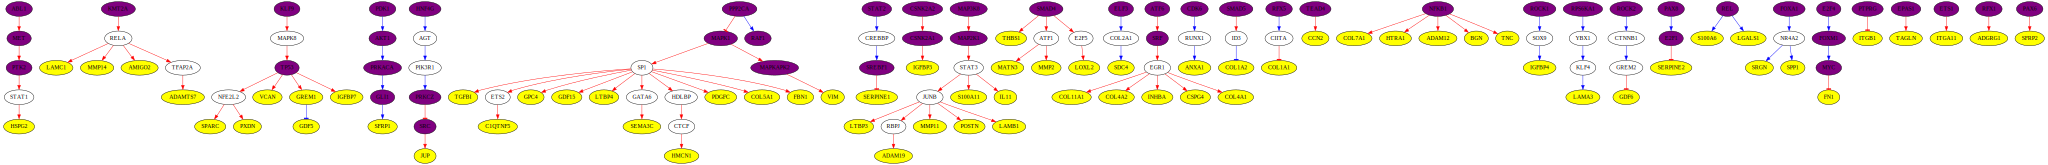

In [12]:

edges_df_3 = edges_df_3.loc[~edges_df_3['edge'].str.contains('meas|pert')]
import graphviz

toplot = edges_df_3.copy()
# separate the edge column from the edge df into source, mor and target
toplot[['source', 'mor', 'target']] = toplot['edge'].str.split('--', expand=True)
# remove rows with null values in the mor values
toplot = toplot[toplot['mor'].notnull()]
# make the mor column numeric after removing parentheses
toplot['mor'] = toplot['mor'].str.replace('(', '').str.replace(')', '').astype(float)
toplot["arrowhead"] = toplot["mor"].apply(lambda x: "normal" if x == 1 else "tee")
# define color using the values of 'value' column, red for negative values and green for positive values
toplot["color"] = toplot["value"].apply(lambda x: "blue" if x < 0 else "red")


# create graphviz object
g = graphviz.Digraph()

# iterate over the rows of the df
for index, row in toplot.iterrows():
    # add source node using "source", "source_shape", "source_fillcolor" columns
    g.node(row["source"])
    # add target node using "target", "target_shape", "target_fillcolor" columns
    g.node(row["target"])
    # add edge using "source", "target", "arrowhead" columns
    g.edge(row["source"], row["target"], arrowhead=row["arrowhead"], color = row["color"])

v = set(meas_df['id']).intersection(set(toplot['source']).union(set(toplot['target'])))
p = set(pert_df['source']).intersection(set(toplot['source']).union(set(toplot['target'])))


# Set the color attribute of the nodes
for node_name in v:
    g.node(node_name, style='filled', fillcolor='yellow')
for node_name in p:
    g.node(node_name, style='filled', fillcolor='purple') 

g

## network 2

<positron-console-cell-13>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


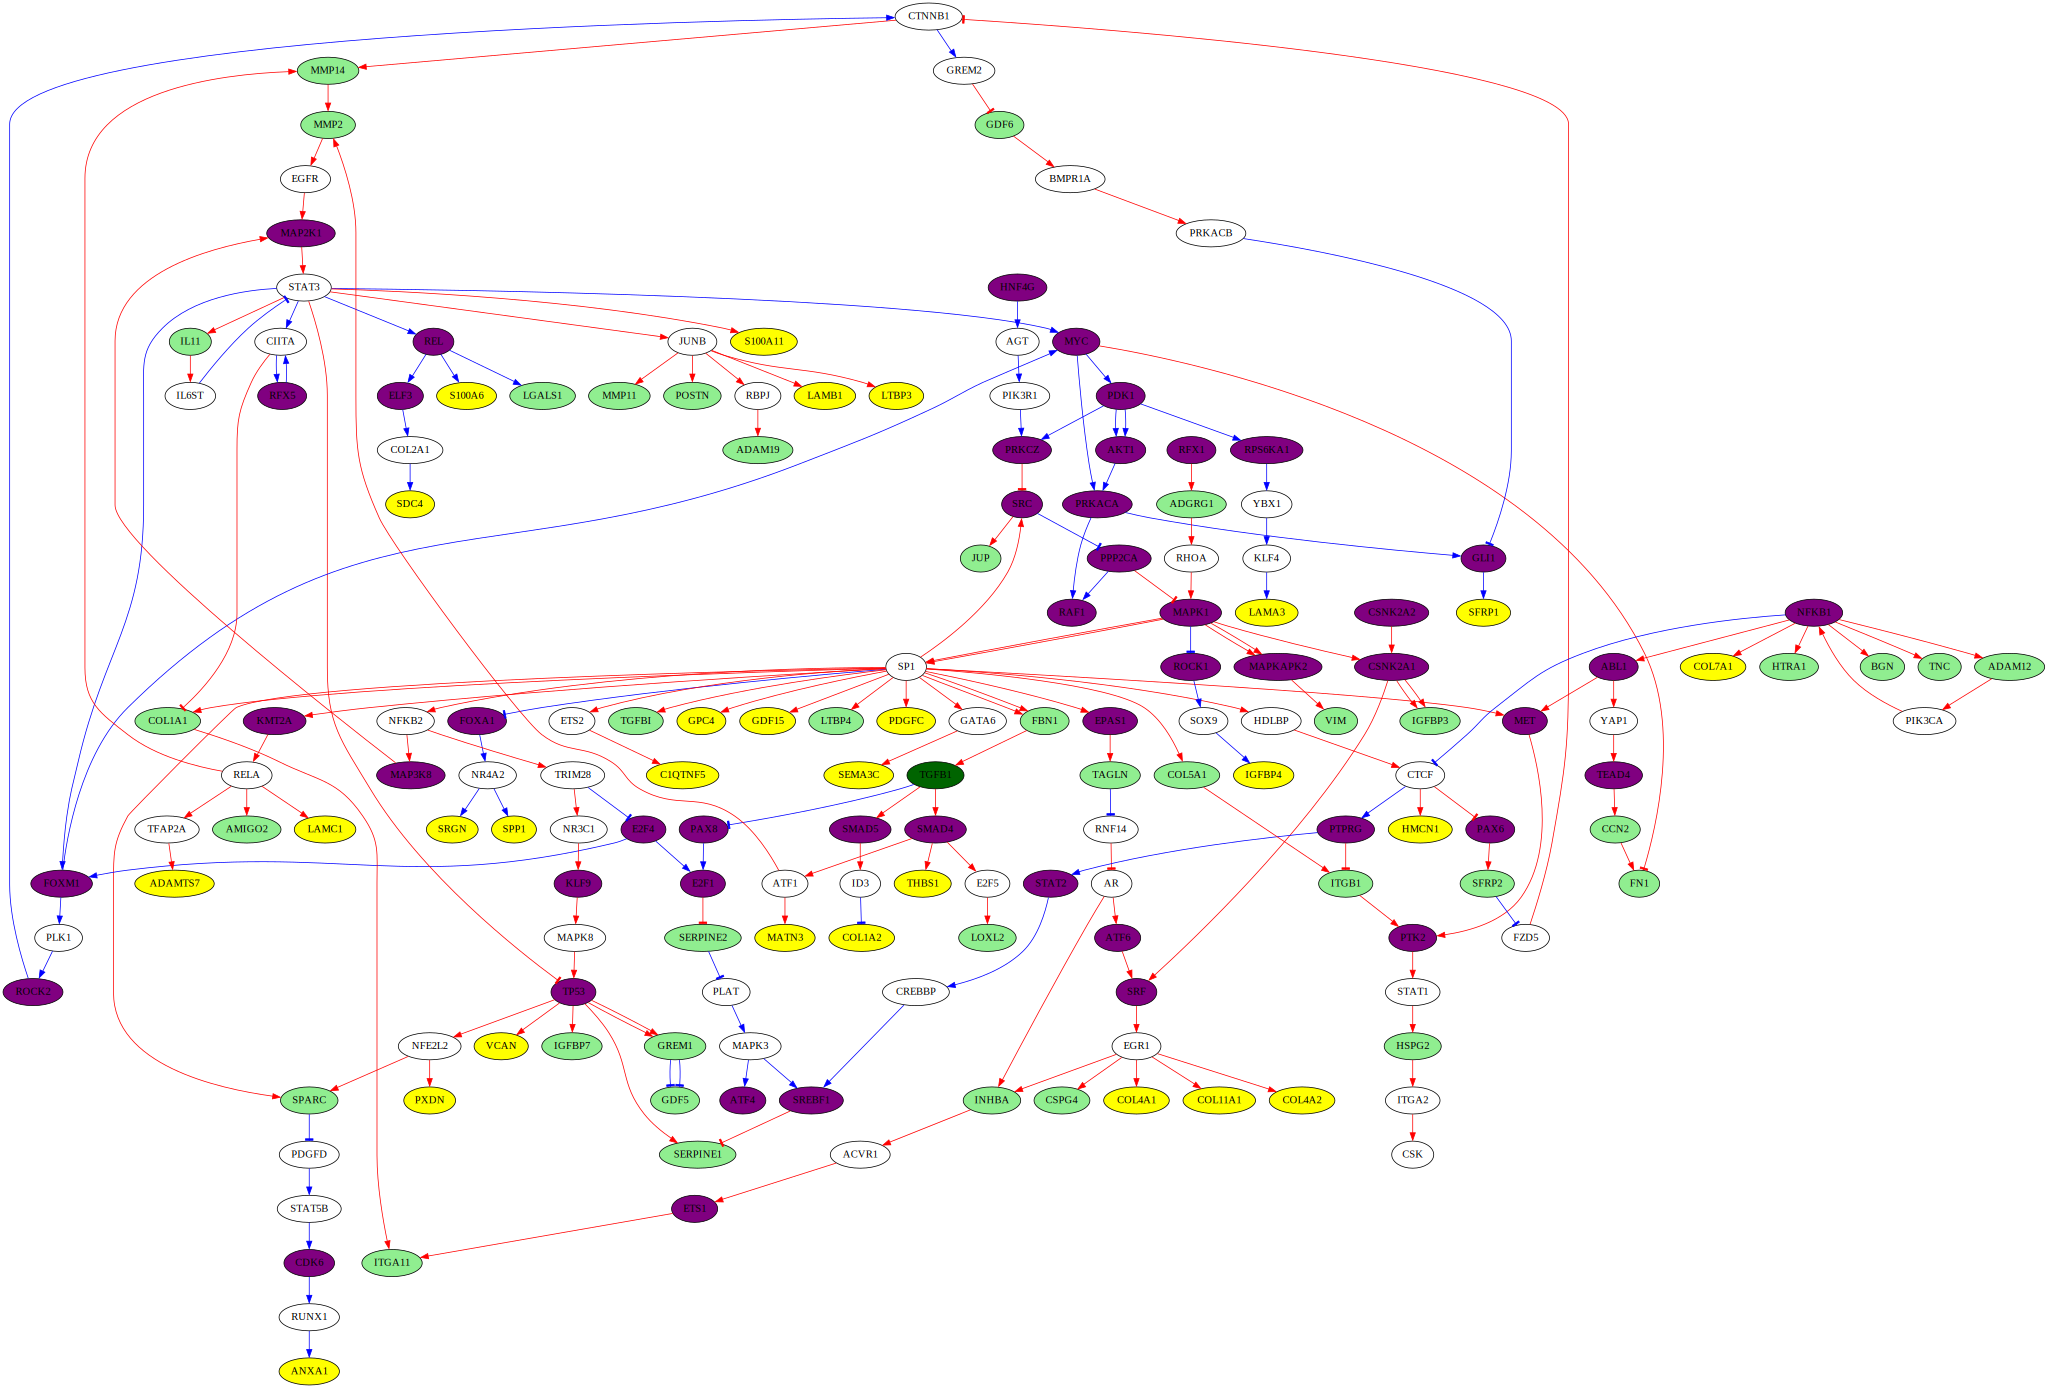

In [13]:
combinededges_df_2 = pd.concat([edges_df_2, edges_df_3], axis=0, ignore_index=True)
combinededges_df_2 = combinededges_df_2.loc[~combinededges_df_2['edge'].str.contains('meas|pert')]
#nodes_df_2.to_csv('230403_firsttry/nodes_df_2_2.tsv', sep='\t', index=False)
#nodes_df_2.to_csv('230403_firsttry/nodes_df_2_2.tsv', sep='\t', index=False)

import graphviz

toplot = combinededges_df_2.copy()
# separate the edge column from the edge df into source, mor and target
toplot[['source', 'mor', 'target']] = toplot['edge'].str.split('--', expand=True)
# remove rows with null values in the mor values
toplot = toplot[toplot['mor'].notnull()]
# make the mor column numeric after removing parentheses
toplot['mor'] = toplot['mor'].str.replace('(', '').str.replace(')', '').astype(float)
toplot["arrowhead"] = toplot["mor"].apply(lambda x: "normal" if x == 1 else "tee")
# define color using the values of 'value' column, red for negative values and green for positive values
toplot["color"] = toplot["value"].apply(lambda x: "blue" if x < 0 else "red")


# create graphviz object
g = graphviz.Digraph()

# iterate over the rows of the df
for index, row in toplot.iterrows():
    # add source node using "source", "source_shape", "source_fillcolor" columns
    g.node(row["source"])
    # add target node using "target", "target_shape", "target_fillcolor" columns
    g.node(row["target"])
    # add edge using "source", "target", "arrowhead" columns
    g.edge(row["source"], row["target"], arrowhead=row["arrowhead"], color = row["color"])

# Define the list of nodes to be colored red
v = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/secretome_df_late.csv')
v = set(meas_df['id']).intersection(set(toplot['source']).union(set(toplot['target'])))

p = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/enzymes_df_late.csv')
p = set(pert_df['source']).intersection(set(toplot['source']).union(set(toplot['target'])))

p_late = pd.read_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/perturbation_df_late.csv')
p_late = set(p_late['id']).intersection(set(toplot['source']).union(set(toplot['target'])))

i = set(v).intersection(set(p_late))


# Set the color attribute of the nodes
for node_name in p_late:
    g.node(node_name, style='filled', fillcolor='darkgreen')
for node_name in v:
    g.node(node_name, style='filled', fillcolor='yellow')
for node_name in p:
    g.node(node_name, style='filled', fillcolor='purple')
for node_name in i:
    g.node(node_name, style='filled', fillcolor='lightgreen')


g

# Save

In [14]:
# combine node tables to two final tables

combinednodes_df = pd.concat([nodes_df, nodes_df_1], axis=0, ignore_index=True)
combinednodes_df_2 = pd.concat([nodes_df_2, nodes_df_3], axis=0, ignore_index=True)

In [15]:
# export nodes and edges table

combinededges_df.to_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/combinededges_df.tsv', sep='\t', index=False)
combinededges_df_2.to_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/combinededges_df_2.tsv', sep='\t', index=False)

combinednodes_df.to_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/combinednodes_df.tsv', sep='\t', index=False)
combinednodes_df_2.to_csv('/Users/burtsche/Documents/01_repos/kidney_fibrosis/network_data/2024-06-27/combinednodes_df_2.tsv', sep='\t', index=False)